In [1]:
def check_columns(DataFrame, reports=False, graphs=False, dates=False):
    """
    This function takes a pandas dataframe as input and returns
    a dataframe with information about each column in the dataframe.
    """

    dataframeinfo = []

    # Check information about the index
    index_dtype = DataFrame.index.dtype
    index_unique_vals = DataFrame.index.unique()
    index_num_unique = DataFrame.index.nunique()
    index_num_null = DataFrame.index.isna().sum()
    index_pct_null = index_num_null / len(DataFrame.index)

    if pd.api.types.is_numeric_dtype(index_dtype) and not isinstance(
        DataFrame.index, pd.RangeIndex
    ):
        index_min_val = DataFrame.index.min()
        index_max_val = DataFrame.index.max()
        index_range_vals = (index_min_val, index_max_val)
    elif pd.api.types.is_datetime64_any_dtype(index_dtype):
        index_min_val = DataFrame.index.min()
        index_max_val = DataFrame.index.max()
        index_range_vals = (
            index_min_val.strftime("%Y-%m-%d"),
            index_max_val.strftime("%Y-%m-%d"),
        )

        # Check for missing dates in the index if dates kwarg is True
        if dates:
            full_date_range = pd.date_range(
                start=index_min_val, end=index_max_val, freq="D"
            )
            missing_dates = full_date_range.difference(DataFrame.index)
            if not missing_dates.empty:
                print(
                    f"Missing dates in index: ({len(missing_dates)} Total) {missing_dates.tolist()}"
                )
    else:
        index_range_vals = None

    dataframeinfo.append(
        [
            "index",
            index_dtype,
            index_num_unique,
            index_num_null,
            index_pct_null,
            index_unique_vals,
            index_range_vals,
        ]
    )

    print(f"Total rows: {DataFrame.shape[0]}")
    print(f"Total columns: {DataFrame.shape[1]}")

    if reports:
        describe = DataFrame.describe().round(2)
        print(describe)

    if graphs:
        DataFrame.hist(figsize=(10, 10))
        plt.subplots_adjust(hspace=0.5)
        plt.show()

    for column in DataFrame.columns:
        dtype = DataFrame[column].dtype
        num_null = DataFrame[column].isna().sum()
        pct_null = DataFrame[column].isna().mean().round(5)

        try:
            unique_vals = DataFrame[column].unique()
            num_unique = DataFrame[column].nunique()
        except TypeError:
            unique_vals = 'Column contains multiple lists'
            num_unique = 'ERROR'

        if pd.api.types.is_numeric_dtype(dtype):
            min_val = DataFrame[column].min()
            max_val = DataFrame[column].max()
            mean_val = DataFrame[column].mean()
            range_vals = (min_val, max_val, mean_val)
        elif pd.api.types.is_datetime64_any_dtype(dtype):
            min_val = DataFrame[column].min()
            max_val = DataFrame[column].max()
            range_vals = (min_val.strftime("%Y-%m-%d"), max_val.strftime("%Y-%m-%d"))

            if dates:
                full_date_range_col = pd.date_range(
                    start=min_val, end=max_val, freq="D"
                )
                missing_dates_col = full_date_range_col.difference(DataFrame[column])
                if not missing_dates_col.empty:
                    print(
                        f"Missing dates in column '{column}': ({len(missing_dates_col)} Total) {missing_dates_col.tolist()}"
                    )
                else:
                    print(f"No missing dates in column '{column}'")

        else:
            range_vals = None

        dataframeinfo.append(
            [column, dtype, num_unique, num_null, pct_null, unique_vals, range_vals]
        )

    return pd.DataFrame(
        dataframeinfo,
        columns=[
            "col_name",
            "dtype",
            "num_unique",
            "num_null",
            "pct_null",
            "unique_values",
            "range (min, max, mean)",
        ],
    )

# Analyst Job Scraping / Analyzing

## CSV From:

- https://www.kaggle.com/datasets/lukebarousse/data-analyst-job-postings-google-search/data?select=gsearch_jobs.csv

> "This dataset pulls job postings from Google's search results for Data Analyst positions in the United States. <br>
> Data collection started on November 4th, 2022, and adds ~100 new job postings to this dataset daily."

## Acquisition

- I originally intended on pulling all of the data myself using LinkedIn webscraping or another job resource.

- I was able to use a scraper for LinkedIn, but after reading into it, they don't like that and have been known to send cease and desist letters.

- Potential

- Google however, is allowed to scrape LinkedIn, for search engine purposes.

- Using Google's job search, we can then scrape all job postings (which also includes LinkedIn).

- Although we have the capability to scrape the postings ourself, due to the limitations, the amount of data to be useful isn't feasibly with the timeline.

- I found a public dataset that has a head start of 33 thousand job postings. (With duplicates)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, MWETokenizer

```python

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

# Initialize Selenium and navigate to the URL
driver = webdriver.Chrome(executable_path='/path/to/chromedriver')
driver.get('URL')

# Define a function to check if "Load More" exists
def load_more_exists():
    try:
        driver.find_element(By.XPATH, 'XPATH_OF_LOAD_MORE_BUTTON')
        return True
    except NoSuchElementException:
        return False

# Loop to scrape data and click Load More
while True:
    # Scrape data from the current page
    job_elements = driver.find_elements(By.XPATH, 'XPATH_OF_JOB_ELEMENTS')
    for job in job_elements:
        # Extract and save job data
        pass

    # Check if "Load More" exists and click it
    if load_more_exists():
        load_more_button = driver.find_element(By.XPATH, 'XPATH_OF_LOAD_MORE_BUTTON')
        load_more_button.click()
    else:
        break

driver.close()

```

In [3]:
# Read in job_scrapes
jobs_df = pd.read_csv("../support_files/working_docs/jobs.csv")

In [4]:
check_columns(jobs_df)

Total rows: 34153
Total columns: 27


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,34153,0,0.00000,"RangeIndex(start=0, stop=34153, step=1)",None
1,Unnamed: 0,int64,34153,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 34152, 17076.0)"
2,index,int64,3785,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 3784, 1141.691418030627)"
3,title,object,13157,0,0.00000,"[Data Analyst, Junior Data Analyst/Scientist R...",None
4,company_name,object,8208,0,0.00000,"[Chloeta, Upwork, ATC, Guidehouse, AnMed Healt...",None
5,location,object,635,24,0.00070,"[ Oklahoma City, OK , Anywhere , United ...",None
6,via,object,556,9,0.00026,"[via ZipRecruiter, via Upwork, via LinkedIn, v...",None
7,description,object,24276,0,0.00000,[Job Summary: The Data Analyst oversees data p...,None
8,extensions,object,5528,0,0.00000,"[['21 hours ago', 'Full-time', 'Health insuran...",None
9,job_id,object,34133,0,0.00000,[eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb...,None


| Field Name | Description |
| --- | --- |
| `Unnamed: 0` | Appears to be an auto-incremented identifier. |
| `index` | Another identifier, possibly redundant with "Unnamed: 0". |
| `title` | Job title. |
| `company_name` | Name of the company offering the job. |
| `location` | Location of the job. |
| `via` | Source/platform where the job was posted. |
| `description` | Detailed description of the job. |
| `extensions` | Additional information about the job (e.g., job type, benefits). |
| `job_id` | A unique identifier for the job, possibly encoded. |
| `thumbnail` | URL to a thumbnail image associated with the job/company. |
| `url` | URL for the job posting. |
| `company_description` | Description of the company. |
| `company_rating` | Company's rating. |
| `rating_count` | Number of ratings the company received. |
| `job_type` | Type of the job (e.g., full-time, part-time). |
| `benefits` | List of benefits provided by the company. |
| `posted` | When the job was posted. |
| `deadline` | Application deadline for the job. |
| `employment_type` | Employment type (e.g., full-time, contract). |
| `commute_time` | Information on commute time, if available. |
| `salary_pay` | Salary payment value, if available. |
| `salary_rate` | Salary rate (e.g., per hour, per year), if available. |
| `salary_avg` | Average salary for the job, if available. |
| `salary_min` | Minimum salary for the job, if available. |
| `salary_max` | Maximum salary for the job, if available. |
| `salary_hourly` | Hourly salary, if available. |
| `salary_yearly` | Yearly salary, if available. |
| `salary_standardized` | Standardized salary information, if available. |
| `description_tokens` | List of skills extracted from the job description. |

## Preparation

The dataset acquired from Kaggle already had some preprocessed information.

In [5]:
check_columns(jobs_df)

Total rows: 34153
Total columns: 27


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,34153,0,0.00000,"RangeIndex(start=0, stop=34153, step=1)",None
1,Unnamed: 0,int64,34153,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 34152, 17076.0)"
2,index,int64,3785,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 3784, 1141.691418030627)"
3,title,object,13157,0,0.00000,"[Data Analyst, Junior Data Analyst/Scientist R...",None
4,company_name,object,8208,0,0.00000,"[Chloeta, Upwork, ATC, Guidehouse, AnMed Healt...",None
5,location,object,635,24,0.00070,"[ Oklahoma City, OK , Anywhere , United ...",None
6,via,object,556,9,0.00026,"[via ZipRecruiter, via Upwork, via LinkedIn, v...",None
7,description,object,24276,0,0.00000,[Job Summary: The Data Analyst oversees data p...,None
8,extensions,object,5528,0,0.00000,"[['21 hours ago', 'Full-time', 'Health insuran...",None
9,job_id,object,34133,0,0.00000,[eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb...,None


### Steps Needed:

Based on the initial examination of the dataset, here are some potential data cleaning tasks that may need to be performed

- **Redundant Columns** 
  
- **Missing Data**

- **Data Transformation**

- **Data Standardization**

- **Data Encoding**
  
- **Outliers**

- **URL Validation**

- **Text Data Cleaning**

- **Date Formatting**

- **Duplicate Data**

#### **Redundant Columns**: 


- The columns "Unnamed: 0" and "index" seem redundant. If they don't provide unique or relevant information, they can be dropped.<br><br>

In [6]:
# Drop the redundant columns "Unnamed: 0" and "index"
jobs_df_cleaned = jobs_df.drop(columns=['Unnamed: 0', 'index'])

#### **Duplicate Data**:


   - Check for duplicate rows and decide whether to keep, flag, or remove them.<br><br>

In [7]:
# Show how many duplicates in job_id
jobs_df_cleaned[jobs_df_cleaned.duplicated(subset=['job_id'])].shape[0]

20

In [8]:
# Drop duplicate job_id
jobs_df_cleaned.drop_duplicates(subset="job_id", inplace=True)

#### **Drop columns we won't be using:**


- Drop columns that we won't be able to find any use for

In [9]:
# Drop the specified columns
columns_to_drop = ['thumbnail', 'search_term', 'commute_time', 'search_location']
jobs_df_cleaned = jobs_df_cleaned.drop(columns=columns_to_drop)

In [10]:
# Drop salary columns that Kaggle dataset created. Only leaving original salary column
columns_to_drop = ['salary_yearly', 'salary_hourly', 'salary_min', 'salary_max', 'salary_pay', 'salary_rate', 'salary_avg', 'salary_standardized', 'description_tokens']

jobs_df_cleaned = jobs_df_cleaned.drop(columns=columns_to_drop)

  
#### **Look Into Missing Data**:


- Several columns have missing data, represented by NaN values (e.g., "thumbnail", "commute_time", "salary_pay", etc.). Depending on the use-case:
  - Fill missing data with appropriate values (mean, median, mode, etc.).
  - Drop rows or columns with a significant amount of missing data.
  - Use data imputation techniques, if appropriate.<br><br>


In [11]:
# Calculate the percentage of missing data for each column
missing_data_percentage = (jobs_df_cleaned.isnull().sum() / len(jobs_df_cleaned)) * 100

# Filter columns with missing data and sort them
missing_data_columns = missing_data_percentage[missing_data_percentage > 0].sort_values(ascending=False)

missing_data_columns

salary            82.125802
work_from_home    55.313040
schedule_type      0.518560
location           0.070313
via                0.026367
dtype: float64

#### **Fixing Salaries**

In [12]:
# get a value counts of salary
jobs_df_cleaned.salary.value_counts()

salary
77K–116K a year           412
40–75 an hour             198
18.33–28.20 an hour       120
15–45 an hour             110
17–50 an hour              95
                         ... 
165K a year                 1
81K–140K a year             1
68,880–101,220 a year       1
52–54 an hour               1
100,815–110,815 a year      1
Name: count, Length: 1308, dtype: int64

In [13]:
# Create a salary cleaned column out of a copy of salary
jobs_df_cleaned['cleaned_salary'] = jobs_df_cleaned['salary']

In [14]:
# Remove decimals and numeric character until you hit a - or [a-zA-Z]
jobs_df_cleaned['cleaned_salary'] = jobs_df_cleaned['cleaned_salary'].str.replace(r'\.\d+(?=[a-zA-Z-])', '', regex=True)

# Replace 'K' or 'k' in the 'cleaned_salary' column with ',000'
jobs_df_cleaned['cleaned_salary'] = jobs_df_cleaned['cleaned_salary'].str.replace('K', '000', case=False, regex=True).str.replace('k', '000', case=False, regex=True)

# Remove commas from all entries in the 'cleaned_salary' column
jobs_df_cleaned['cleaned_salary'] = jobs_df_cleaned['cleaned_salary'].str.replace(',', '', regex=False)

In [15]:
# Extract pay rate
jobs_df_cleaned['pay_rate'] = jobs_df_cleaned['cleaned_salary'].str.extract(r'(\bhour\b|\bmonth\b|\byear\b)', expand=False)

# Add "ly" to the entire column
jobs_df_cleaned['pay_rate'] = jobs_df_cleaned['pay_rate'].str.replace(r'(\bhour\b|\bmonth\b|\byear\b)', r'\1ly', regex=True)

In [16]:
# Drop all letters from salary cleaned column
jobs_df_cleaned['cleaned_salary'] = jobs_df_cleaned['cleaned_salary'].str.replace(r'[a-zA-Z]', '', regex=True)

In [17]:
# Function to get min salary
def get_min_salary(salary):
    return salary.split('–')[0]

# Function to get max salary
def get_max_salary(salary):
    values = salary.split('–')
    if len(values) == 1:
        return values[0]
    return values[1]

# Make salary cleaned a string
jobs_df_cleaned['cleaned_salary'] = jobs_df_cleaned['cleaned_salary'].astype(str)

# Apply the functions to get min_salary and max_salary columns
jobs_df_cleaned['min_salary'] = jobs_df_cleaned['cleaned_salary'].apply(get_min_salary)
jobs_df_cleaned['max_salary'] = jobs_df_cleaned['cleaned_salary'].apply(get_max_salary)

In [18]:
# Make an avg_salary column using the average of min and max
jobs_df_cleaned['avg_salary'] = (jobs_df_cleaned['min_salary'].astype(float) + jobs_df_cleaned['max_salary'].astype(float)) / 2

In [19]:
# If pay rate is hourly, multiply min_salary, max_salary, and avg_salary by 2080
jobs_df_cleaned.loc[jobs_df_cleaned['pay_rate'] == 'hourly', ['min_salary', 'max_salary', 'avg_salary']] = jobs_df_cleaned.loc[jobs_df_cleaned['pay_rate'] == 'hourly', ['min_salary', 'max_salary', 'avg_salary']].astype(float) * 2080

In [20]:
# If pay rate is monthly, multiply min_salary, max_salary, and avg_salary by 12
jobs_df_cleaned.loc[jobs_df_cleaned['pay_rate'] == 'monthly', ['min_salary', 'max_salary', 'avg_salary']] = jobs_df_cleaned.loc[jobs_df_cleaned['pay_rate'] == 'monthly', ['min_salary', 'max_salary', 'avg_salary']].astype(float) * 12

In [21]:
# Look at hourly pay rates
jobs_df_cleaned.filter(like='_salary').loc[jobs_df_cleaned['pay_rate'] == 'hourly'].sample(1)

,cleaned_salary,min_salary,max_salary,avg_salary
17093,75–120,156000.0,249600.0,202800.0


In [22]:
# Look at monthly pay rates
jobs_df_cleaned.filter(like='_salary').loc[jobs_df_cleaned['pay_rate'] == 'monthly'].sample(1)

,cleaned_salary,min_salary,max_salary,avg_salary
26272,4000–5000,48000.0,60000.0,54000.0


In [23]:
check_columns(jobs_df_cleaned)

Total rows: 34133
Total columns: 17


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,34133,0,0.00000,"Index([ 0, 1, 2, 3, 4, ...","(0, 34152)"
1,title,object,13157,0,0.00000,"[Data Analyst, Junior Data Analyst/Scientist R...",None
2,company_name,object,8208,0,0.00000,"[Chloeta, Upwork, ATC, Guidehouse, AnMed Healt...",None
3,location,object,635,24,0.00070,"[ Oklahoma City, OK , Anywhere , United ...",None
4,via,object,556,9,0.00026,"[via ZipRecruiter, via Upwork, via LinkedIn, v...",None
5,description,object,24276,0,0.00000,[Job Summary: The Data Analyst oversees data p...,None
6,extensions,object,5528,0,0.00000,"[['21 hours ago', 'Full-time', 'Health insuran...",None
7,job_id,object,34133,0,0.00000,[eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb...,None
8,posted_at,object,80,0,0.00000,"[21 hours ago, 17 hours ago, 12 hours ago, 10 ...",None
9,schedule_type,object,22,177,0.00519,"[Full-time, Contractor, Part-time, Internship,...",None


##### **Fixing Work From Home**

In [24]:
# Fill NA in work from home with false
jobs_df_cleaned['work_from_home'] = jobs_df_cleaned['work_from_home'].fillna(False)

In [25]:
# value counts
jobs_df_cleaned.work_from_home.value_counts(dropna=False)

work_from_home
False    18880
True     15253
Name: count, dtype: int64

##### **Look at Location Nulls**

In [26]:
# value counts
jobs_df_cleaned.location.value_counts(dropna=False)

location
 Anywhere                 8159
Anywhere                  7094
  United States           5483
United States             3660
  Oklahoma City, OK        604
                          ... 
  Cuba, KS                   1
  Elmwood, MO                1
  Edgerton, KS               1
  Linwood, KS                1
Sand Springs, OK             1
Name: count, Length: 636, dtype: int64

In [27]:
# Remove leading whitespace
jobs_df_cleaned['location'] = jobs_df_cleaned['location'].str.strip()

In [28]:
# Make the output scrollable, if ya want
# pd.set_option('display.max_rows', 10)

# value counts
jobs_df_cleaned.location.value_counts(dropna=False)

location
Anywhere                15253
United States            9143
Kansas City, MO          1072
Oklahoma City, OK         984
Jefferson City, MO        767
                        ...  
Westwood, MA                1
Northpoint, AR              1
Okay, OK                    1
Revere, MA                  1
Berkeley Heights, NJ        1
Name: count, Length: 486, dtype: int64

In [29]:
jobs_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34133 entries, 0 to 34152
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           34133 non-null  object 
 1   company_name    34133 non-null  object 
 2   location        34109 non-null  object 
 3   via             34124 non-null  object 
 4   description     34133 non-null  object 
 5   extensions      34133 non-null  object 
 6   job_id          34133 non-null  object 
 7   posted_at       34133 non-null  object 
 8   schedule_type   33956 non-null  object 
 9   work_from_home  34133 non-null  bool   
 10  salary          6101 non-null   object 
 11  date_time       34133 non-null  object 
 12  cleaned_salary  34133 non-null  object 
 13  pay_rate        6101 non-null   object 
 14  min_salary      34133 non-null  object 
 15  max_salary      34133 non-null  object 
 16  avg_salary      6101 non-null   float64
dtypes: bool(1), float64(1), object(15)
m

In [30]:
# Make the column a string
jobs_df_cleaned['location_cleaned'] = jobs_df_cleaned['location'].astype(str)

# If the string has (+X others), change it to "Multiple Locations"
jobs_df_cleaned['location_cleaned'] = jobs_df_cleaned['location_cleaned'].apply(lambda x: 'Multiple Locations' if '(' in x else x)

In [31]:
# Make a lambda for all the states and apply it to a state column, to reduce location values
jobs_df_cleaned['location_cleaned'] = jobs_df_cleaned['location_cleaned'].apply(lambda x: x.split(',')[1].strip() if ',' in x else x)

In [32]:
# Create a dictionary with state abbreviations and full names
state_dict = {'CA': 'California', 'NY': 'New York', 'NJ': 'New Jersey', 'MO': 'Missouri', 'OK': 'Oklahoma', 'KS': 'Kansas', 'AR': 'Arkansas', 'TX': 'Texas', 'MA': 'Massachusetts', 'NE': 'Nebraska', 'PA': 'Pennsylvania', 'DC': 'District of Columbia', 'CT': 'Connecticut', 'NH': 'New Hampshire'}

# Replace state abbreviations with full names
jobs_df_cleaned['location_cleaned'] = jobs_df_cleaned['location_cleaned'].replace(state_dict)

In [33]:
# value counts
jobs_df_cleaned.location_cleaned.value_counts(dropna=False)

location_cleaned
Anywhere                15253
United States            9143
Missouri                 3740
Oklahoma                 2131
Kansas                   1917
Arkansas                 1691
California                114
Multiple Locations         45
Texas                      38
nan                        24
Nebraska                   10
Massachusetts              10
New York                    7
Pennsylvania                4
District of Columbia        2
New Jersey                  2
Connecticut                 1
New Hampshire               1
Name: count, dtype: int64

In [34]:
# Show rows where state is "nan"
jobs_df_cleaned.loc[jobs_df_cleaned['location_cleaned'] == 'nan']

,title,company_name,location,via,description,extensions,job_id,posted_at,schedule_type,work_from_home,salary,date_time,cleaned_salary,pay_rate,min_salary,max_salary,avg_salary,location_cleaned
5632,Junior Data Scientist,AUX Partners,NaN,via LinkedIn,Junior Data Scientist\n\nSalary: 80-90k (annua...,"['11 hours ago', '80K–90K a year', 'Full-time'...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBTY2llbnRpc3...,11 hours ago,Full-time,False,80K–90K a year,2023-10-10 03:00:29.664551,80000–90000,yearly,80000,90000,85000.0,nan
5726,Business Intelligence Analyst,Advantage Tech,NaN,via LinkedIn,Summary:\n\nThe BI Consultant will assist the ...,"['13 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBJbnRlbGxpZ2VuY2...,13 hours ago,Full-time,False,NaN,2023-10-31 03:00:23.839760,nan,NaN,nan,nan,NaN,nan
5727,Business Intelligence Analyst,Advantage Tech,NaN,via LinkedIn,Summary:\n\nThe BI Consultant will assist the ...,"['13 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBJbnRlbGxpZ2VuY2...,13 hours ago,Full-time,False,NaN,2023-10-31 03:00:25.990539,nan,NaN,nan,nan,NaN,nan
8282,Data Manager,Advantage Tech,NaN,via LinkedIn,REQUIREMENTS:\n• Bachelor’s Degree in Computer...,"['5 hours ago', '150K–155K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIE1hbmFnZXIiLCJodGlkb2...,5 hours ago,Full-time,False,150K–155K a year,2023-09-20 03:00:29.332068,150000–155000,yearly,150000,155000,152500.0,nan
8396,Business Intelligence Developer,Insight Global,NaN,via LinkedIn,Must haves:\n• Confident in interfacing with b...,"['8 hours ago', '60–65 an hour', 'Contractor']",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBJbnRlbGxpZ2VuY2...,8 hours ago,Contractor,False,60–65 an hour,2023-09-27 03:00:31.478873,60–65,hourly,124800.0,135200.0,130000.0,nan
20856,"Business Intelligence Analyst (Lenexa, KS)",Equity Staffing Group,NaN,via LinkedIn,Equity Staffing has a new Business Intelligenc...,"['10 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBJbnRlbGxpZ2VuY2...,10 hours ago,Full-time,False,NaN,2023-06-24 03:00:25.669926,nan,NaN,nan,nan,NaN,nan
20859,Data Specialist,Advantage Tech,NaN,via LinkedIn,"RESPONSIBILITIES\n• Design, implement and main...","['10 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIFNwZWNpYWxpc3QiLCJodG...,10 hours ago,Full-time,False,NaN,2023-07-07 03:00:41.440998,nan,NaN,nan,nan,NaN,nan
20953,"Business Intelligence Analyst (Lenexa, KS)",Equity Staffing Group,NaN,via LinkedIn,Equity Staffing has a new Business Intelligenc...,"['10 hours ago', '95K–120K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBJbnRlbGxpZ2VuY2...,10 hours ago,Full-time,False,95K–120K a year,2023-06-28 03:00:37.183774,95000–120000,yearly,95000,120000,107500.0,nan
21283,Business Intelligence Analyst,Advantage Tech,NaN,via LinkedIn,The purpose of this position is to work direct...,"['12 hours ago', '85K–95K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBJbnRlbGxpZ2VuY2...,12 hours ago,Full-time,False,85K–95K a year,2023-07-06 03:01:13.066700,85000–95000,yearly,85000,95000,90000.0,nan
24637,Health Data Analyst,Dobies Health Marketing,NaN,via LinkedIn,Health Data Analyst\n\nDobies Health Marketing...,"['5 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJIZWFsdGggRGF0YSBBbmFseXN0Ii...,5 hours ago,Full-time,False,NaN,2023-01-20 04:00:46.456624,nan,NaN,nan,nan,NaN,nan


Insignificant amount of nulls when location is cleaned up. Value added with reducing location values. 

We'll leave the nulls, since they can still be used for analysis of everything besides location.

In [35]:
# Calculate the percentage of missing data for each column
missing_data_percentage = (jobs_df_cleaned.isnull().sum() / len(jobs_df_cleaned)) * 100

# Filter columns with missing data and sort them
missing_data_columns = missing_data_percentage[missing_data_percentage > 0].sort_values(ascending=False)

missing_data_columns

salary           82.125802
pay_rate         82.125802
avg_salary       82.125802
schedule_type     0.518560
location          0.070313
via               0.026367
dtype: float64


##### **Data Transformation**:
   - The "extensions" column seems to have mixed data types (e.g., job type, benefits). This column might be split into multiple columns for easier analysis.
   - The "description_tokens" column contains lists as strings. These might need to be parsed into actual lists or split into multiple columns.<br><br>



#### **Text Data Cleaning**:


   - The "description" and "company_description" columns might contain special characters, HTML tags, or other non-textual data that need to be cleaned.
   - Tokenization, stemming, and lemmatization might be applied to text data if you plan to perform Natural Language Processing (NLP) tasks.<br><br>


In [36]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter

# Ensure necessary resources are available
nltk.download('punkt')
nltk.download('stopwords')

# Tokenize and normalize the descriptions
def tokenize_and_normalize(text):
    tokens = word_tokenize(text)
    # Convert to lowercase and remove punctuation and stopwords
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stopwords.words('english')]
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zacschmitz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zacschmitz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


```python

jobs_df_cleaned['description_cleaned'] = jobs_df_cleaned['description'].apply(tokenize_and_normalize)

# Export CSV
jobs_df_cleaned.to_csv('../support_files/working_docs/jobs_cleaned_tokenized.csv', index=False)

```

In [37]:
# Read in CSV
jobs_df_cleaned = pd.read_csv("../support_files/working_docs/jobs_cleaned_tokenized.csv")

In [38]:
# Picked out keywords based on all keywords (only looked words with 100+ occurrences)
keywords_programming = [
'sql', 'python', 'r', 'c', 'c#', 'javascript', 'js',  'java', 'scala', 'sas', 'matlab', 
'c++', 'c/c++', 'perl', 'go', 'typescript', 'bash', 'html', 'css', 'php', 'powershell', 'rust', 
'kotlin', 'ruby',  'dart', 'assembly', 'swift', 'vba', 'lua', 'groovy', 'delphi', 'objective-c', 
'haskell', 'elixir', 'julia', 'clojure', 'solidity', 'lisp', 'f#', 'fortran', 'erlang', 'apl', 
'cobol', 'ocaml', 'crystal', 'javascript/typescript', 'golang', 'nosql', 'mongodb', 't-sql', 'no-sql',
'visual_basic', 'pascal', 'mongo', 'pl/sql',  'sass', 'vb.net', 'mssql',
]
# Pick out ML Algorithm keywords
keywords_ML_Algorithms = [x.lower() for x in ['regression','clustering', 'classification', 'predictive', 'prediction','decision trees',
       'Decision Trees, Random Forests',
       'Convolutional Neural Networks','CNN',
       'Gradient Boosting Machines (xgboost, lightgbm, etc)',
       'Bayesian Approaches', 'Dense Neural Networks (MLPs, etc)','DNN',
       'Recurrent Neural Networks','RNN',
       'Transformer Networks (BERT, gpt-3, etc)', 'Graph Neural Networks','Transformer'
       'Autoencoder Networks (DAE, VAE, etc)',
       'Generative Adversarial Networks', 'None',
       'Evolutionary Approaches',] ]
# Viz keywords
keyword_viz = [x.lower() for x in ['Matplotlib', 'Seaborn', 'Plotly',
       'Ggplot', 'None', 'Shiny', 'Geoplotlib', 'Bokeh',
       'D3 js', 'Other', 'Leaflet / Folium', 'Pygal', 'Altair',
       'Dygraphs', 'Highcharter', 'tableau',  'Microsoft Power BI', 'Google Data Studio',
       'Amazon QuickSight', 'Qlik Sense', 'Other',
       'Microsoft Azure Synapse ', 'Looker', 'Alteryx ',
       'SAP Analytics Cloud ', 'TIBCO Spotfire', 'Domo', 'Sisense ',
       'Thoughtspot '] ]
# Computer vision and nlp
keyword_cvnlp = ['computer vision','natural language processing']
# Big data keywords
keyword_big_data = ['mysql', 'postgresql', 'microsoft sql', 'sqlite', 'mongodb',
                    'bigquery', 'oracle database', 'azure sql', 'amazon rds', 'google cloud sql', 'snowflake']
# More big data
keyword_big_data_2 = [x.lower() for x in  ['MySQL ', 'PostgreSQL ', 'Microsoft SQL Server ', 'SQLite ',
       'MongoDB ', 'None', 'Google Cloud BigQuery ', 'Oracle Database ',
       'Microsoft Azure SQL Database ', 'Amazon RDS ',
       'Google Cloud SQL ', 'Snowflake ', 'Amazon Redshift ',
       'Amazon DynamoDB ', 'Other', 'IBM Db2 '] ]
# Business Intelligence keywords
keyword_bi = [x.lower() for x in ['tableau',  'Power BI', 'Power_bi', 'Google Data Studio',
       'QuickSight', 'Qlik Sense', 'Other',
       'Azure Synapse ', 'Looker', 'Alteryx ',
       'SAP Analytics Cloud ', 'TIBCO Spotfire', 'Domo', 'Sisense ',
       'Thoughtspot '] ]
# More business intelligence
keyword_bi_2 = [x.lower() for x in ['tableau',  'Microsoft Power BI', 'Google Data Studio',
       'Amazon QuickSight', 'Qlik Sense', 'Other',
       'Microsoft Azure Synapse ', 'Looker', 'Alteryx ',
       'SAP Analytics Cloud ', 'TIBCO Spotfire', 'Domo', 'Sisense ',
       'Thoughtspot '] ]
# Analyst tools
keywords_analyst_tools = [
'excel', 'tableau',  'word', 'powerpoint', 'looker', 'powerbi', 'outlook', 'azure', 'jira', 'twilio',  'snowflake', 
'shell', 'linux', 'sas', 'sharepoint', 'mysql', 'visio', 'git', 'mssql', 'powerpoints', 'postgresql', 'spreadsheets',
'seaborn', 'pandas', 'gdpr', 'spreadsheet', 'alteryx', 'github', 'postgres', 'ssis', 'numpy', 'power_bi', 'spss', 'ssrs', 
'microstrategy',  'cognos', 'dax', 'matplotlib', 'dplyr', 'tidyr', 'ggplot2', 'plotly', 'esquisse', 'rshiny', 'mlr',
'docker', 'linux', 'jira',  'hadoop', 'airflow', 'redis', 'graphql', 'sap', 'tensorflow', 'node', 'asp.net', 'unix',
'jquery', 'pyspark', 'pytorch', 'gitlab', 'selenium', 'splunk', 'bitbucket', 'qlik', 'terminal', 'atlassian', 'unix/linux',
'linux/unix', 'ubuntu', 'nuix', 'datarobot',
]
# Cloud tools
keywords_cloud_tools = [
'aws', 'azure', 'gcp', 'snowflake', 'redshift', 'bigquery', 'aurora','amazon','ec2','s3',
]
# Not using
keywords_general_tools = [
'microsoft', 'slack', 'apache', 'ibm', 'html5', 'datadog', 'bloomberg',  'ajax', 'persicope', 'oracle', 
]
# Not using
keywords_general = [
'coding', 'server', 'database', 'cloud', 'warehousing', 'scrum', 'devops', 'programming', 'saas', 'ci/cd', 'cicd', 
'ml', 'data_lake', 'frontend',' front-end', 'back-end', 'backend', 'json', 'xml', 'ios', 'kanban', 'nlp',
'iot', 'codebase', 'agile/scrum', 'agile', 'ai/ml', 'ai', 'paas', 'machine_learning', 'macros', 'iaas',
'fullstack', 'dataops', 'scrum/agile', 'ssas', 'mlops', 'debug', 'etl', 'a/b', 'slack', 'erp', 'oop', 
'object-oriented', 'etl/elt', 'elt', 'dashboarding', 'big-data', 'twilio', 'ui/ux', 'ux/ui', 'vlookup', 
'crossover',  'data_lake', 'data_lakes', 'bi', 
]

In [39]:
keywords = keywords_programming + keywords_ML_Algorithms + keywords_analyst_tools + keywords_cloud_tools 

jobs_df_cleaned = jobs_df_cleaned[jobs_df_cleaned.description.notnull()] # filter out null values
jobs_df_cleaned = jobs_df_cleaned.reset_index() # throwing index issues if don't reset index
# jobs_df_cleaned = jobs_df_cleaned.head(10) 

jobs_df_cleaned['description_tokens'] = ""
for index, row in jobs_df_cleaned.iterrows():
    # lowercase words
    detail = row.description.lower()
    # tokenize words
    detail = word_tokenize(detail)
    # handle multi-word tokenization (e.g., 'Power BI')
    multi_tokens = [('power', 'bi'), ('data', 'lake'), ('data', 'lakes'), ('machine', 'learning'), ('objective', 'c'),
                    ('visual', 'basic'), ('predictive', 'prediction'), ('plotly','express'), ('ggplot','ggplot'), ('d3','js') ]
    tokenizer = MWETokenizer(multi_tokens)
    detail = tokenizer.tokenize(detail)
    # remove duplicates
    detail = list(set(detail))
    # filter for keywords only
    detail = [word for word in detail if word in keywords] 
    # replace duplicate keywords
    replace_tokens = {'powerbi' : 'power_bi', 'spreadsheets': 'spreadsheet'}
    for key, value in replace_tokens.items():
        detail = [d.replace(key, value) for d in detail]
    # add to details list # row.description_tokens = detail
    jobs_df_cleaned.at[index, 'description_tokens'] = detail

In [40]:
def replace_skills(skills):
    return ['c++' if skill in ['c/c++', 'c++'] else skill for skill in skills]

jobs_df_cleaned['description_tokens'] = jobs_df_cleaned['description_tokens'].apply(replace_skills)

##### **Date Formatting**:
   - Make our date time columns usable

In [41]:
# Change date_time to date_scraped
jobs_df_cleaned.rename(columns={'date_time': 'date_scraped'}, inplace=True)

In [42]:
# Convert "posted_at" to timedelta
jobs_df_cleaned['posted_at'] = pd.to_timedelta(jobs_df_cleaned['posted_at'].str.extract('(\d+)')[0].astype(int), unit='h')

In [43]:
# Convert "date_scraped" to datetime
jobs_df_cleaned['date_scraped'] = pd.to_datetime(jobs_df_cleaned['date_scraped'])

In [44]:
# Create "posting_created" column
jobs_df_cleaned['posting_created'] = jobs_df_cleaned['date_scraped'] - jobs_df_cleaned['posted_at']

In [45]:
# Rename posted_at to time since posting
jobs_df_cleaned.rename(columns={'posted_at': 'time_since_posting'}, inplace=True)

In [46]:
# Change posting_created to be date time formated with only hours and minutes
jobs_df_cleaned['posting_created'] = jobs_df_cleaned['posting_created'].dt.strftime('%Y-%m-%d %H:%M')

#### **Make a simple job title column**

In [47]:
# Show me the title column
jobs_df_cleaned.title

0                                             Data Analyst
1        Junior Data Analyst/Scientist Role - Contract ...
2                                             Data Analyst
3                                             Data Analyst
4                                             Data Analyst
                               ...                        
34128                       Marketing Data & BI Analyst II
34129                                    Lead-Data Analyst
34130                                    Lead-Data Analyst
34131                                    Lead-Data Analyst
34132    Institutional Credit Management - Lending Data...
Name: title, Length: 34133, dtype: object

In [48]:
def standardize_titles(df):
    """
    This function takes a DataFrame as a parameter. 
    It standardizes the job titles in the 'title' column based on certain keywords.

    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    DataFrame: The DataFrame with standardized job titles.
    """
    
    # Define the mapping of keywords to standardized titles
    title_mapping = {
        "scie": "Data Scientist",
        "eng": "Data Engineer",
        "ana": "Data Analyst"
    }
    
    # Apply the mapping to the 'title' column
    df['title_cleaned'] = df['title'].apply(lambda x: next((v for k, v in title_mapping.items() if k in x.lower()), x))
    
    # If a title_cleaned isn't one of those 3, make it Other
    df['title_cleaned'] = df['title_cleaned'].apply(lambda x: "Other" if x not in title_mapping.values() else x)

    return df

In [49]:
jobs_df_cleaned = standardize_titles(jobs_df_cleaned)

In [50]:
# Value count for title_cleaned
jobs_df_cleaned.title_cleaned.value_counts()

title_cleaned
Data Analyst      29319
Other              2172
Data Scientist     1638
Data Engineer      1004
Name: count, dtype: int64

In [51]:
jobs_df_cleaned[['title', 'title_cleaned']].sample(10)

,title,title_cleaned
10711,Data Analyst,Data Analyst
4156,Data Engineer,Data Engineer
20853,Associate Research/Data Analyst (OEWS),Data Analyst
19161,Data Analyst,Data Analyst
28123,Data Scientist - Risk,Data Scientist
19983,GA & GSC API Expert,Other
22551,Senior Data Analyst,Data Analyst
21557,"Junior Freight Pay Data Analyst - EXCEL, Suppl...",Data Analyst
12518,Data Analyst,Data Analyst
30361,ESG Analyst with data,Data Analyst


In [52]:
# Predicting "Other" job title won't provide any value, so we'll drop it from all of our datasets

jobs_df_cleaned = jobs_df_cleaned[jobs_df_cleaned["title_cleaned"] != "Other"]

#### **Make a Sector Column**

In [53]:
def create_sector_column(df):
    """
    This function takes a DataFrame as a parameter. 
    It creates a new 'sector' column in the DataFrame based on certain keywords in the 'description' column.

    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    DataFrame: The DataFrame with the new 'sector' column.
    """
    
    # Define the mapping of keywords to sectors
    sector_mapping = {
        "finance": "Finance",
        "business": "Business",
        "healthcare": "Healthcare",
        "patient": "Healthcare",
        "technology": "Technology",
        "education": "Education",
        "retail": "Retail",
        "property": "Real Estate"
    }
    
    # Apply the mapping to the 'description' column
    df['sector'] = df['description'].apply(lambda x: next((v for k, v in sector_mapping.items() if k in x.lower()), "Other"))
    
    return df

In [54]:
jobs_df_cleaned = create_sector_column(jobs_df_cleaned)

In [55]:
jobs_df_cleaned

,index,title,company_name,location,via,description,extensions,job_id,time_since_posting,schedule_type,...,pay_rate,min_salary,max_salary,avg_salary,location_cleaned,description_cleaned,description_tokens,posting_created,title_cleaned,sector
0,0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 21:00:00,Full-time,...,NaN,NaN,NaN,NaN,Oklahoma,"['job', 'summary', 'data', 'analyst', 'oversee...","[classification, r, python]",2023-08-02 06:00,Data Analyst,Finance
1,1,Junior Data Analyst/Scientist Role - Contract ...,Upwork,Anywhere,via Upwork,"Company\n\nThe TAC Index provides independent,...","['17 hours ago', 'Work from home', 'Contractor...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBBbmFseXN0L1...,0 days 17:00:00,Contractor,...,NaN,NaN,NaN,NaN,Anywhere,"['company', 'tac', 'index', 'provides', 'indep...","[r, matplotlib, mongodb, postgresql, matlab, p...",2023-08-02 10:00,Data Scientist,Education
2,2,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 12:00:00,Full-time,...,NaN,NaN,NaN,NaN,United States,"['job', 'title', 'entry', 'level', 'business',...",[],2023-08-02 15:00,Data Analyst,Other
3,3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"['10 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 10:00:00,Full-time,...,NaN,NaN,NaN,NaN,Kansas,"['job', 'family', 'data', 'science', 'analysis...","[qlik, excel, powerpoint, perl, word, r, power...",2023-08-02 17:00,Data Analyst,Real Estate
4,4,Data Analyst,AnMed Health LLC,Anywhere,via LinkedIn,"AnMed is a dynamic, comprehensive health syste...","['18 hours ago', 'Work from home', 'Part-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0 days 18:00:00,Part-time,...,NaN,NaN,NaN,NaN,Anywhere,"['anmed', 'dynamic', 'comprehensive', 'health'...",[],2023-08-02 09:00,Data Analyst,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34128,34128,Marketing Data & BI Analyst II,EDWARD JONES,"Houstonia, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '76,798–130,764 a year', 'Ful...",eyJqb2JfdGl0bGUiOiJNYXJrZXRpbmcgRGF0YSBcdTAwMj...,0 days 23:00:00,Full-time,...,yearly,76798.0,130764.0,103781.0,Missouri,"['edward', 'jones', 'help', 'clients', 'achiev...","[power_bi, excel, r, python, snowflake, sql, t...",2022-11-03 04:40,Data Analyst,Technology
34129,34129,Lead-Data Analyst,EDWARD JONES,"Marshfield, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,0 days 23:00:00,Full-time,...,yearly,106916.0,182047.0,144481.5,Missouri,"['edward', 'jones', 'help', 'clients', 'achiev...",[],2022-11-23 05:00,Data Analyst,Technology
34130,34130,Lead-Data Analyst,EDWARD JONES,"High Point, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,0 days 23:00:00,Full-time,...,yearly,106916.0,182047.0,144481.5,Missouri,"['edward', 'jones', 'help', 'clients', 'achiev...",[],2022-12-06 05:00,Data Analyst,Technology
34131,34131,Lead-Data Analyst,EDWARD JONES,"Calhoun, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,0 days 23:00:00,Full-time,...,yearly,106916.0,182047.0,144481.5,Missouri,"['edward', 'jones', 'help', 'clients', 'achiev...",[],2022-12-07 05:00,Data Analyst,Technology


In [56]:
# Show me sector and job title
jobs_df_cleaned[['sector', 'title_cleaned', 'title']].sample(10)

,sector,title_cleaned,title
8796,Other,Data Analyst,Power BI Analyst W2
8536,Finance,Data Analyst,Data Analyst (Clearance Required)
29729,Healthcare,Data Analyst,HIM Data Integrity Analyst
18695,Other,Data Engineer,Data Analyst/Drilling Engineering Technician
33652,Other,Data Analyst,"(SENIOR) DATA ANALYST (M/F/D) Wien, Austria Co..."
22187,Finance,Data Analyst,Senior Data Analyst - Cox Business - Now Hiring
15152,Healthcare,Data Analyst,QNXT Data Analyst
15839,Other,Data Analyst,Looker Expert needed to analyze the data and b...
1782,Education,Data Scientist,Data Scientist (Hybrid / Remote)
25798,Finance,Data Analyst,Sr. Data Analyst (Strategic Finance and Execut...


### **Only look at full time employees**

During exploration it was identified that contract (typically freelance) positions tend to pay a lot more than full time.
- Some of these positions were offering up to $750 an hour
- This caused issues when we annualized the pay (multiplied by 2080 for hourly)

Freelance work is typically not something for entry level positions, so for now we won't be looking into those.

In [57]:
# value counts for schedule type
jobs_df_cleaned.schedule_type.value_counts(dropna=False)

schedule_type
Full-time                               24186
Contractor                               5717
Contractor and Temp work                  860
Part-time                                 345
Full-time and Part-time                   197
Internship                                187
NaN                                       175
Full-time and Contractor                   77
Full-time and Temp work                    57
Full-time and Internship                   49
Temp work                                  37
Full-time, Contractor, and Temp work       17
Part-time and Internship                   13
Part-time, Contractor, and Temp work       12
Part-time and Contractor                   11
Full-time, Part-time, and Internship        6
Full-time, Part-time, and Contractor        5
Full-time, Part-time, and Temp work         4
Part-time and Temp work                     2
Per diem                                    1
Volunteer                                   1
Full-time and Per di

In [58]:
# If the schedule type does not have "Full-time", drop it
jobs_df_cleaned = jobs_df_cleaned[jobs_df_cleaned['schedule_type'] == 'Full-time']

In [59]:
# value counts for schedule type
jobs_df_cleaned.schedule_type.value_counts(dropna=False)

schedule_type
Full-time    24186
Name: count, dtype: int64

### Retain DF variable

In [60]:
# Rename prepped DF for future use
jobs_prepped = jobs_df_cleaned.copy()

### Final dropping of unused columns

In [130]:
# Drop the original title, original location, extensions, job_id, time_since_posting, schedule_type, pay_rate, min_salary, max_salary
columns_to_drop = ['title', 'location', 'extensions', 'job_id', 'time_since_posting', 'schedule_type', 'pay_rate', 'min_salary', 'max_salary']
jobs_prepped = jobs_prepped.drop(columns=columns_to_drop)

In [134]:
# Drop date_scraped, cleaned_salary, index
columns_to_drop = ['date_scraped', 'cleaned_salary', 'index']
jobs_prepped = jobs_prepped.drop(columns=columns_to_drop)

In [138]:
# Reset index
jobs_prepped = jobs_prepped.drop(columns='index')

### Export Fully Prepped CSV

In [125]:
# Export as CSV
# jobs_prepped.to_csv("../support_files/working_docs/jobs_prepped.csv", index=False)

### Read in Prepped CSV

In [ ]:
# Read in CSV
jobs_df_cleaned = pd.read_csv("../support_files/working_docs/jobs_prepped.csv")

In [142]:
#check the dtype of description_tokens column
jobs_df_cleaned.description_tokens.dtype

dtype('O')

In [143]:
type_of_first_element = type(jobs_df_cleaned.description_tokens.iloc[0])
print(type_of_first_element)

<class 'str'>


In [144]:
# Convert the string back into a list
import ast
jobs_df_cleaned['description_tokens'] = jobs_df_cleaned['description_tokens'].apply(ast.literal_eval)

In [145]:
type_of_first_element = type(jobs_df_cleaned.description_tokens.iloc[0])
print(type_of_first_element)

<class 'list'>


## Exploration

### Splits

In [146]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (Our validate will be generated during GridSearch)
train, test = train_test_split(jobs_df_cleaned, train_size=0.8, test_size=0.2, random_state=321)

# Print sizes, length of set and ratio of total
print(f"Train size: {len(train)} ({len(train) / len(jobs_df_cleaned):.2%})")
print(f"Test size: {len(test)} ({len(test) / len(jobs_df_cleaned):.2%})")

Train size: 19348 (80.00%)
Test size: 4838 (20.00%)


In [147]:
# Rename our train, into our variable we have previously used
jobs_df_cleaned = train.copy()

### Plots

In [148]:
check_columns(jobs_df_cleaned)

Total rows: 19348
Total columns: 12


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,19348,0,0.00000,"Index([ 680, 12139, 14949, 14906, 3206, 2370...","(2, 24185)"
1,company_name,object,6248,0,0.00000,"[RECRUIT 4 YOU, LLC, UKG, iSphere, Children's ...",None
2,via,object,469,5,0.00026,"[via LinkedIn, via Fairygodboss, via Trabajo.o...",None
3,description,object,13562,0,0.00000,[**Job Opportunity: Remote Entry-Level Data En...,None
4,work_from_home,bool,2,0,0.00000,"[True, False]","(False, True, 0.28845358693405004)"
5,salary,object,708,17355,0.89699,"[nan, 19 an hour, 125K–145K a year, 76,798–130...",None
6,avg_salary,float64,434,17355,0.89699,"[nan, 39520.0, 135000.0, 103781.0, 100000.0, 1...","(24960.0, 288000.0, 98412.93276718515)"
7,location_cleaned,object,16,17,0.00088,"[Anywhere, Oklahoma, Kansas, United States, Mi...",None
8,description_cleaned,object,12592,0,0.00000,"[['job', 'opportunity', 'remote', 'data', 'ent...",None
9,description_tokens,object,ERROR,0,0.00000,Column contains multiple lists,None


In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

def eda_plot(df, column, topn=20):
    """
    This function takes a DataFrame, a column name, and a number as parameters. 
    It creates a bar plot of the top 'n' most frequent values in the specified column.

    Parameters:
    df (DataFrame): The input DataFrame.
    column (str): The name of the column to plot.
    topn (int): The number of top values to include in the plot.

    Returns:
    None
    """
    
    # Create a figure
    plt.figure(figsize=(12, 4))
    
    # Get the top 'n' most frequent values in the column
    top_values = df[column].value_counts().nlargest(topn)
    
    # Create a bar plot of the top values
    # Use the 'hsv' colormap to get different colors for each bar
    sns.barplot(x=top_values.index, y=top_values.values, palette="hsv")
    
    # Set the title and labels
    plt.title(f"'{column}' column value counts", fontsize=20)
    plt.ylabel("Counts", fontsize=15)
    plt.xlabel(column, fontsize=15)
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")
    
    # Display the plot
    plt.show()


### What <u>core</u> job titles does our dataset consist of?

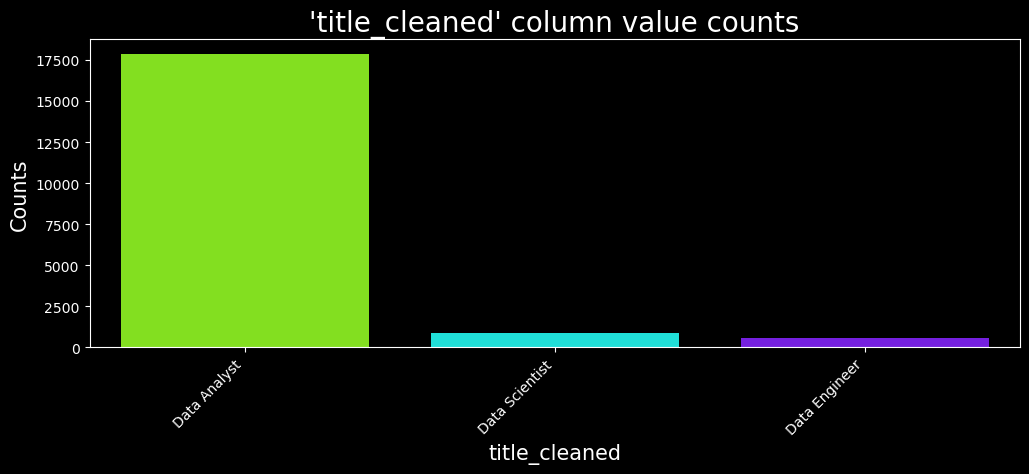

In [150]:
# Plot all of the counts of titles
eda_plot(jobs_df_cleaned, 'title_cleaned', topn=10)

In [151]:
jobs_df_cleaned['title_cleaned'].value_counts(normalize=True)

title_cleaned
Data Analyst      0.923093
Data Scientist    0.046051
Data Engineer     0.030856
Name: proportion, dtype: float64

In [152]:
jobs_df_cleaned['title_cleaned'].value_counts(normalize=False)

title_cleaned
Data Analyst      17860
Data Scientist      891
Data Engineer       597
Name: count, dtype: int64

**Our dataset is PRIMARILY composed up of dat analyst roles**<br>
*this makes sense, because the search term for the original scraping method was "Data Analyst"*

1. Data Analyst (29,319)
2. Data Scientist (1,638)
3. Data Engineer (1,004)

### What companies have the most job postings?

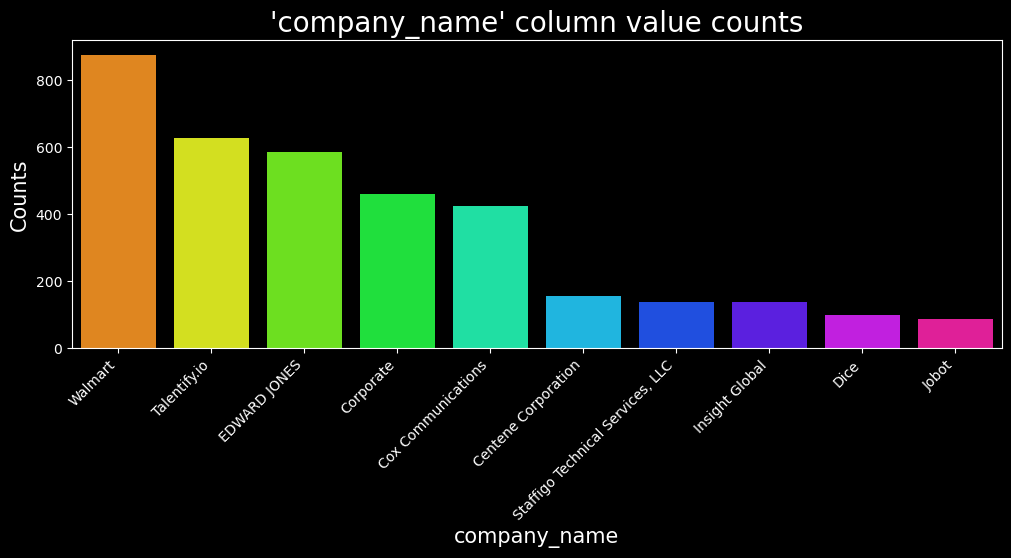

In [153]:
eda_plot(jobs_df_cleaned, 'company_name', topn=10)

In [154]:
jobs_df_cleaned['company_name'].value_counts().head(10)

company_name
Walmart                             876
Talentify.io                        628
EDWARD JONES                        584
Corporate                           460
Cox Communications                  425
Centene Corporation                 155
Staffigo Technical Services, LLC    138
Insight Global                      137
Dice                                 99
Jobot                                85
Name: count, dtype: int64

It looks like a majority of postings are for the company Upwork, which is a freelancer marketplace typically for contract-type work.

Other companies that stand out are:

1. Walmart (1,173)
2. Edward Jones (738)
3. Cox Communications (524)

### What is the location spread for our dataset?

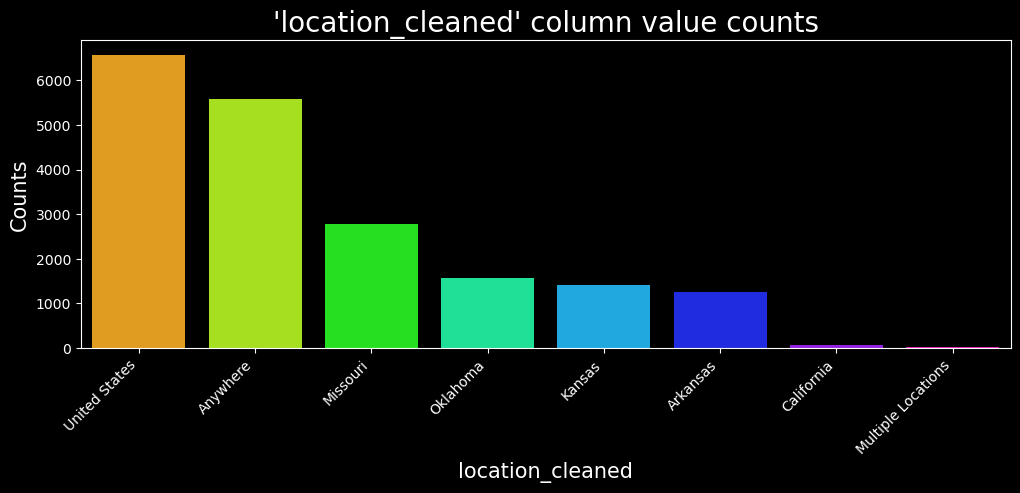

In [155]:
eda_plot(jobs_df_cleaned, 'location_cleaned', topn=8)

In [156]:
# value counts
jobs_df_cleaned.location_cleaned.value_counts(dropna=False).head(9)

location_cleaned
United States         6576
Anywhere              5581
Missouri              2790
Oklahoma              1560
Kansas                1421
Arkansas              1247
California              70
Multiple Locations      32
Texas                   30
Name: count, dtype: int64

Our dataset isn't actually the whole United States.

- It looks like Anywhere (15,253) is fully remote, hiring globally
- We believe that United States is going to be remote, hiring people from United States
- In the specific region, Missouri seems to be hiring the most with 3,740 job postings

### Within the Google Jobs search, which site has the most postings?

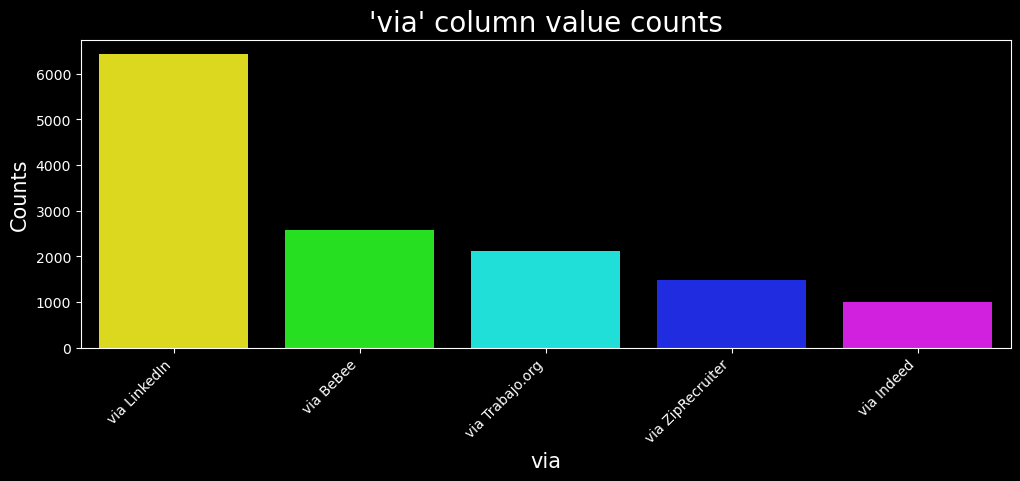

In [157]:
eda_plot(jobs_df_cleaned, 'via', topn=5)

In [158]:
# value counts
jobs_df_cleaned.via.value_counts(dropna=False).head(5)

via
via LinkedIn        6430
via BeBee           2575
via Trabajo.org     2124
via ZipRecruiter    1487
via Indeed           999
Name: count, dtype: int64

LinkedIn has the largest representation in Google Jobs searches at 11,129.

- Upwork came in at 5,561
- BeBee has 3,641

### Common Words

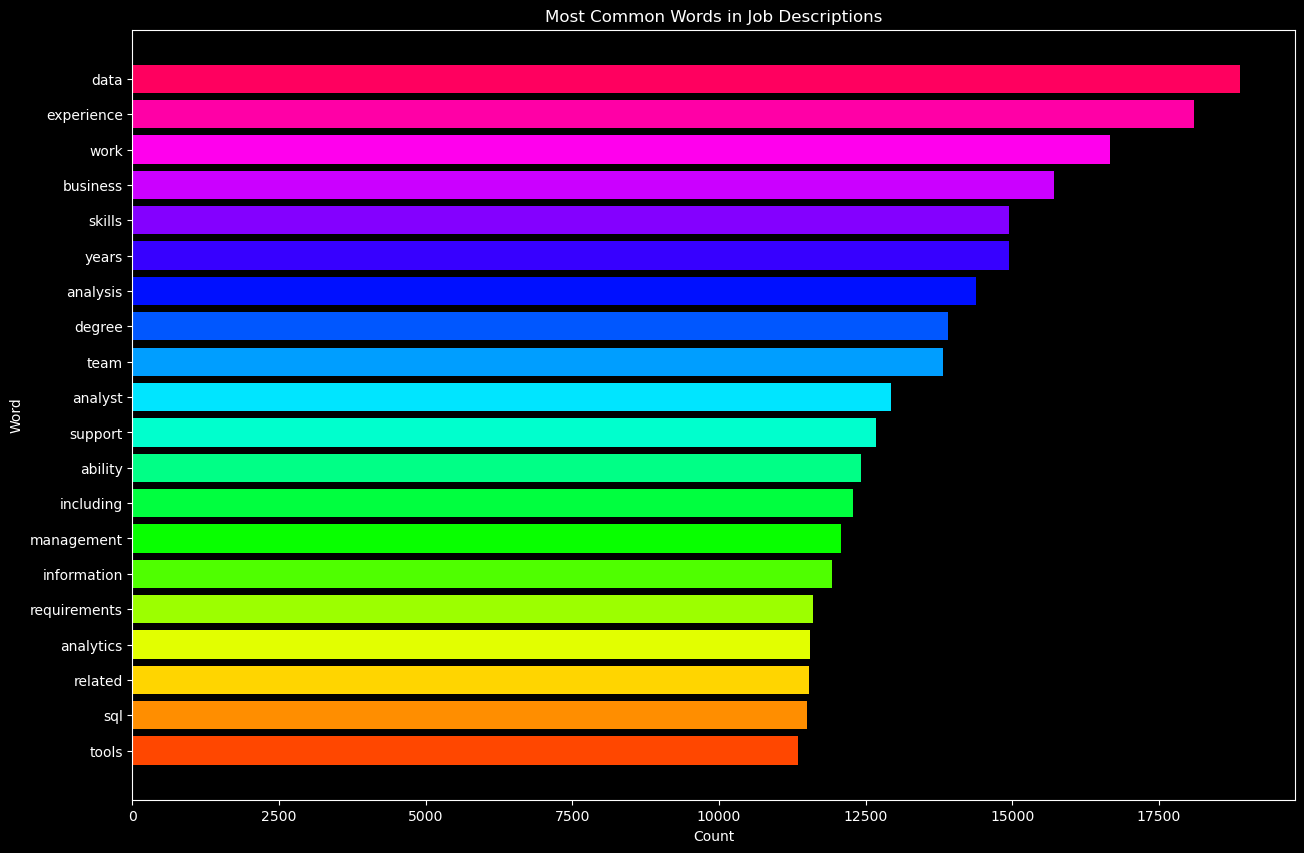

In [160]:
def get_most_common_words_frequency_df(df, column_name, n):
    """
    Get the n most common words from a specific column of a dataframe and return as a DataFrame with frequency.
    
    Parameters:
    - df (DataFrame): The dataframe containing the data.
    - column_name (str): The name of the column containing lists of words.
    - n (int): The number of most common words to retrieve.
    
    Returns:
    - DataFrame: A dataframe with three columns: 'word', 'count', and 'frequency'.
    """
    
    # Ensure the column is interpreted as lists, but only if the value is a string
    df[column_name] = df[column_name].apply(lambda x: eval(x) if isinstance(x, str) else x)

    # Get the frequency of each word in each row
    word_frequency = df[column_name].apply(lambda words_list: {word: 1 for word in set(words_list)})
    
    # Combine all the dictionaries into one big dictionary
    combined_frequency = Counter({key: 0 for key in set().union(*word_frequency)})
    for freq in word_frequency:
        combined_frequency.update(freq)

    # Sort the dictionary by values in descending order and get the top n words
    most_common_words = combined_frequency.most_common(n)

    # Convert to DataFrame
    result_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

    # Sort by highest occurence first
    result_df = result_df.sort_values(by='count', ascending=True)
    
    # Calculate the frequency
    total_rows = df.shape[0]
    result_df['frequency'] = result_df['count'] / total_rows
    
    return result_df

import matplotlib.pyplot as plt
import seaborn as sns

common_words = get_most_common_words_frequency_df(jobs_df_cleaned, 'description_cleaned', 20)

# Generate a list of colors
colors = sns.color_palette('hsv', len(common_words))

# Plot common words
plt.figure(figsize=(15, 10))
plt.barh(common_words['word'], common_words['count'], color=colors)
plt.title('Most Common Words in Job Descriptions')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

### Do a majority of places want work from home or in-house workers?

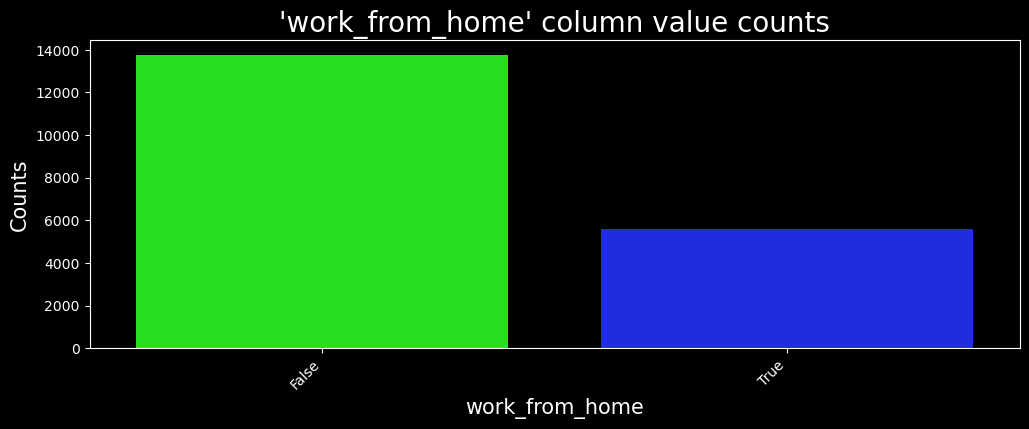

In [162]:
eda_plot(jobs_df_cleaned, 'work_from_home', topn=10)

During the time of this dataset (Nov 2022 through Oct 2023) a majority of postings did not want work from home employees.

- While there may be more in-place demand, I'm sure compared jobs/sectors, this is a higher ration of work from home than most.

### What sectors are hiring the most data analysts?

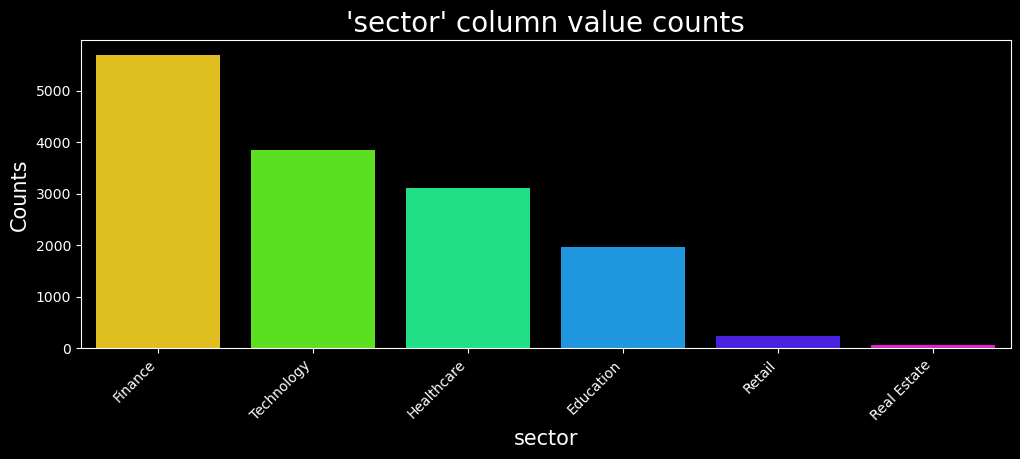

In [163]:
# Only include sectors not equal to other
eda_plot(jobs_df_cleaned[jobs_df_cleaned['sector'] != 'Other'], 'sector', topn=10)

In [164]:
# value counts
jobs_df_cleaned.sector.value_counts(dropna=False).head(10)

sector
Finance        5695
Other          4398
Technology     3848
Healthcare     3119
Education      1972
Retail          245
Real Estate      71
Name: count, dtype: int64

Finance is by far the most popular sector with 8,008 postings.

- Tech and healthcare positions were also popular with about 5,000 a piece.

### NLP Exploration

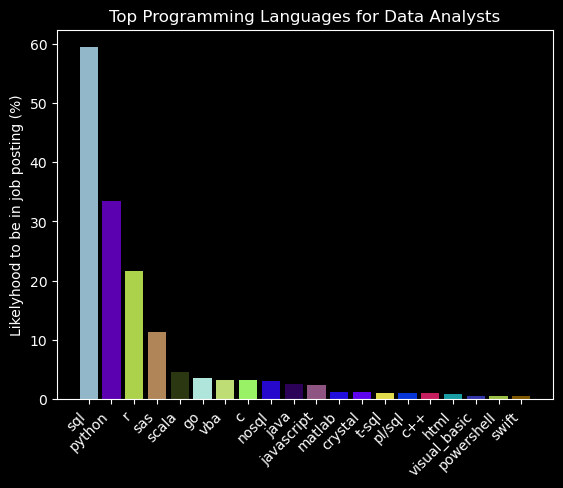

In [165]:
def filtered_keywords(jobs_filtered, keywords, title="Keyword Analysis", head=20):
    # get keywords in a column
    count_keywords = pd.DataFrame(jobs_filtered.description_tokens.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')

    # get frequency of occurence of word (as word only appears once per line)
    length = len(jobs_filtered) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plot the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = plt.bar(x="keywords", height="percentage", data=count_keywords , color=np.random.rand(len(count_keywords.keywords), 3))
    plt.xlabel("")
    plt.ylabel("Likelyhood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(title) 
    plt.show(g)

filtered_keywords(jobs_df_cleaned, keywords_programming, title="Top Programming Languages for Data Analysts")

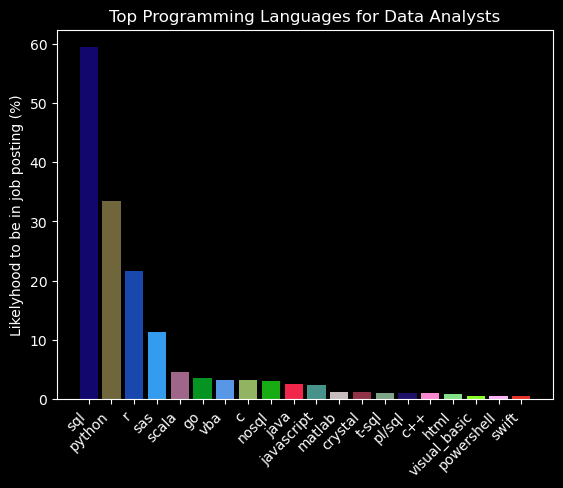

In [166]:
filtered_keywords(jobs_df_cleaned, keywords_programming, title="Top Programming Languages for Data Analysts")

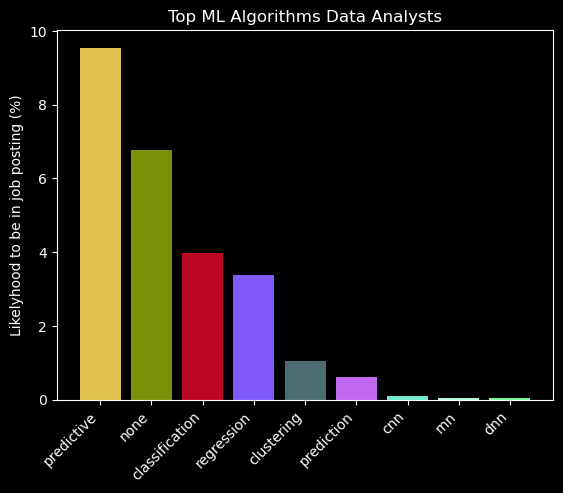

In [167]:
filtered_keywords(jobs_df_cleaned, keywords_ML_Algorithms, title="Top ML Algorithms Data Analysts")

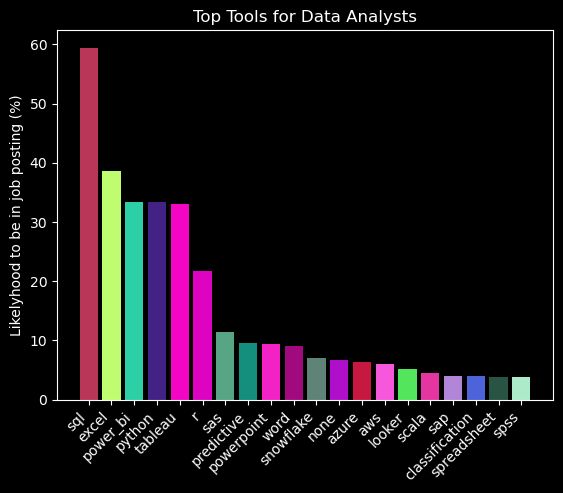

In [168]:
filtered_keywords(jobs_df_cleaned, keywords, title="Top Tools for Data Analysts")

### Job Posting Timeline

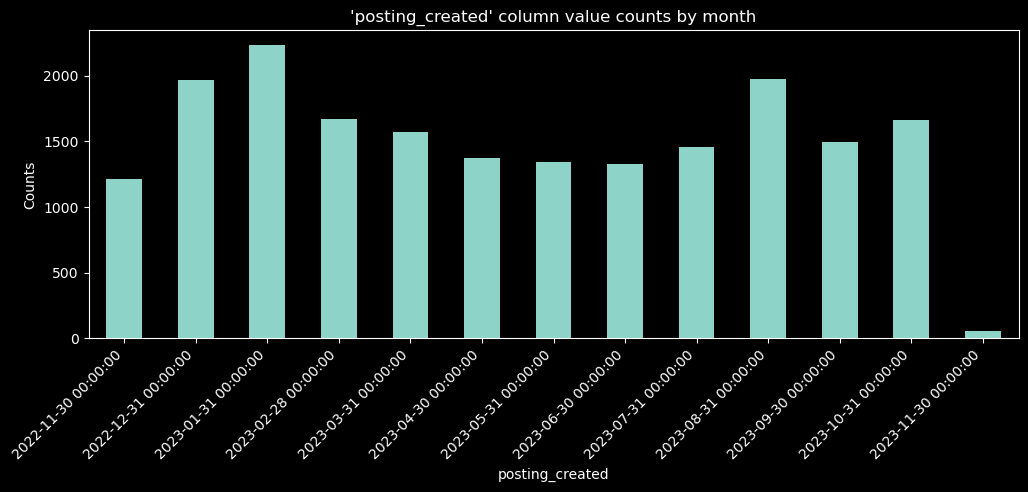

In [169]:
# Make a new df with date time index
jobs_df_cleaned_date = jobs_df_cleaned.copy()

# Make posting_created date time
jobs_df_cleaned_date['posting_created'] = pd.to_datetime(jobs_df_cleaned_date['posting_created'])

# Set index to posting_created
jobs_df_cleaned_date.set_index('posting_created', inplace=True)

# Resample 'posting_created' to monthly frequency and count the number of postings
monthly_postings = jobs_df_cleaned_date.resample('M').size()

# Plot the monthly postings
plt.figure(figsize=(12, 4))
monthly_postings.plot(kind="bar")
plt.title("'posting_created' column value counts by month")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

<p style="font-size:40px;">Tasha suggested breakdown of Title for time of year</p>

In [170]:
# def get_top_skills(df, qty):
#     """
#     This function takes a DataFrame and a quantity as parameters. 
#     It returns a DataFrame with the top skills by number of postings, their frequency, and their average yearly salary. 
#     The quantity parameter determines the number of top skills to return.

#     Parameters:
#     df (DataFrame): The input DataFrame.
#     qty (int): The number of top skills to return.

#     Returns:
#     DataFrame: A DataFrame with the top skills, their number of postings, their frequency, and their average yearly salary.
#     """
    
#     # Initialize an empty dictionary to store the skills and their counts
#     skills_counts = {}
    
#     # Loop over the values in the 'description_tokens' column
#     for val in df.description_tokens.values:
#         # Convert the list of skills in each posting to a set to remove duplicates
#         unique_skills = set(val)
#         # Increment the count for each unique skill
#         for skill in unique_skills:
#             if skill in skills_counts:
#                 skills_counts[skill] += 1
#             else:
#                 skills_counts[skill] = 1
    
#     # Get the top skills and their counts
#     top_skill_count = sorted(skills_counts.items(), key=lambda x: -x[1])[:qty]
    
#     # Separate the skills and counts into two lists
#     top_skills = list(map(lambda x: x[0], top_skill_count))
#     top_counts = list(map(lambda x: x[1], top_skill_count))
    
#     # Initialize an empty list to store the average salaries
#     salaries = []
    
#     # Loop over the top skills and calculate their average salary
#     for skill in top_skills: 
#         salaries.append(df[df.description_tokens.apply(lambda x: skill in x)].avg_salary.mean())
    
#     # Create a DataFrame with the top skills, their number of postings, and their average yearly salary
#     top_skills_df = pd.DataFrame({"skill": list(top_skills), "number_of_postings": top_counts,"avg_yearly_salary": list(map(round, salaries))})
    
#     # Calculate the frequency of each skill
#     top_skills_df['frequency (%)'] = round((top_skills_df['number_of_postings'] / df.shape[0]) * 100, 2)
    
#     # Sort the DataFrame by average yearly salary in descending order
#     top_skills_df = top_skills_df.sort_values("number_of_postings", ascending=False)

#     # Remove 'none'
#     top_skills_df = top_skills_df[top_skills_df['skill'] != 'none']
    
#     return top_skills_df

# top_skills_df = get_top_skills(jobs_df_cleaned, 95)
# top_skills_df

In [171]:
def get_top_skills(df, qty):
    """
    This function takes a DataFrame and a quantity as parameters. 
    It returns a DataFrame with the top skills by number of postings, their frequency, and their average yearly salary. 
    The quantity parameter determines the number of top skills to return.

    Parameters:
    df (DataFrame): The input DataFrame.
    qty (int): The number of top skills to return.

    Returns:
    DataFrame: A DataFrame with the top skills, their number of postings, their frequency, and their average yearly salary.
    """
    
    # Initialize an empty dictionary to store the skills and their counts
    skills_counts = {}
    
    # Loop over the values in the 'description_tokens' column
    for val in df.description_tokens.values:
        # Convert the list of skills in each posting to a set to remove duplicates
        unique_skills = set(val)
        # Increment the count for each unique skill
        for skill in unique_skills:
            if skill in skills_counts:
                skills_counts[skill] += 1
            else:
                skills_counts[skill] = 1
    
    # Get the top skills and their counts
    top_skill_count = sorted(skills_counts.items(), key=lambda x: -x[1])[:qty]
    
    # Separate the skills and counts into two lists
    top_skills = list(map(lambda x: x[0], top_skill_count))
    top_counts = list(map(lambda x: x[1], top_skill_count))
    
    # Initialize an empty list to store the average salaries
    salaries = []
    
    # Loop over the top skills and calculate their average salary
    for skill in top_skills: 
        skill_df = df[df.description_tokens.apply(lambda x: skill in x)]
        if skill_df.avg_salary.isna().all():  # If all salaries for this skill are NaN
            salaries.append(np.nan)  # Append NaN to the salaries list
        else:
            salaries.append(skill_df.avg_salary.mean())
    
    # Create a DataFrame with the top skills, their number of postings, and their average yearly salary
    top_skills_df = pd.DataFrame({
        "skill": top_skills, 
        "number_of_postings": top_counts,
        "avg_yearly_salary": [round(s) if s == s else np.nan for s in salaries]  # Only round the salary if it is not NaN
    })
    
    # Calculate the frequency of each skill
    top_skills_df['frequency (%)'] = round((top_skills_df['number_of_postings'] / df.shape[0]) * 100, 2)
    
    # Sort the DataFrame by average yearly salary in descending order
    top_skills_df = top_skills_df.sort_values("number_of_postings", ascending=False)

    # Remove 'none'
    top_skills_df = top_skills_df[top_skills_df['skill'] != 'none']

    # Round values to 2 decimals
    top_skills_df['avg_yearly_salary'] = top_skills_df['avg_yearly_salary'].round()
    
    return top_skills_df

In [172]:
top_skills_df = get_top_skills(jobs_df_cleaned, 100)

top_skills_df

,skill,number_of_postings,avg_yearly_salary,frequency (%)
0,sql,11496,100279.0,59.42
1,excel,7464,89299.0,38.58
2,python,6458,112188.0,33.38
3,tableau,6404,99178.0,33.10
4,power_bi,5954,97628.0,30.77
...,...,...,...,...
95,cnn,19,NaN,0.10
96,js,19,NaN,0.10
97,asp.net,18,80000.0,0.09
98,linux/unix,16,80000.0,0.08


In [173]:
# Export as CSV
top_skills_df.to_csv("../support_files/working_docs/top_skills.csv", index=False)

In [174]:
import plotly.express as px

fig = px.treemap(top_skills_df, path=['skill'], values='frequency (%)',
                  color='avg_yearly_salary', color_continuous_scale='Blues')

fig.update_traces(textfont_size=40,
                      hovertemplate='''
    <b>Skill:</b> %{label} <br> \
    <b>Frequency:</b> %{value}% <br> \
    <b>Average Salary:</b> $%{color}<extra></extra>''',
                    hoverlabel=dict(font_size=20))

fig.update_layout(
    title_text="<b style='font-size: 60px;'>Data Jobs (All Skills)</b><br><br><i style='font-size: 30px;'>Salaries and Popularity</i>", 
    title_x=0.07, 
    title_y=0.93,
    font_color="white",
    paper_bgcolor="#444444", 
    coloraxis_colorbar=dict(title="Average Annual Salary"),
    width=1600,
    height=1000
)

fig.show()

### Interactive Plot

In [175]:
import plotly.express as px
import ipywidgets as widgets

In [176]:
def plot_skills_data(top_skills_df, keywords, keywords_programming, keywords_ML_Algorithms, keyword_viz, keyword_bi, keyword_bi_2, keywords_cloud_tools, keyword_big_data):
    import plotly.express as px
    import ipywidgets as widgets

    # Dropdown widget
    dropdown = widgets.Dropdown(
        options=[('All Skills', keywords), ('Programming Languages', keywords_programming), 
                 ('ML Algorithms', keywords_ML_Algorithms), ('Visualization Tools', keyword_viz + keyword_bi + keyword_bi_2), 
                 ('Big Data & Cloud', keywords_cloud_tools + keyword_big_data)],
        value=None,  # Set initial value to None
        description='Select:',
    )

    def update_plot(skill_list):
        if skill_list is None:
            return None

        # Filter DataFrame based on selected skills
        df = top_skills_df[top_skills_df['skill'].isin(skill_list)]

        fig = px.treemap(df, path=['skill'], values='frequency (%)',
                          color='avg_yearly_salary', color_continuous_scale='Blues')

        fig.update_traces(textfont_size=40,
                          hovertemplate='''
        <b>Skill:</b> %{label} <br> \
        <b>Frequency:</b> %{value}% <br> \
        <b>Average Salary:</b> $%{color}<extra></extra>''',
                        hoverlabel=dict(font_size=20))

        fig.update_layout(
            title_text="<b style='font-size: 60px;'>Data Jobs</b><br><br><i style='font-size: 30px;'>Salaries and Popularity</i>", 
            title_x=0.07, 
            title_y=0.93,
            font_color="white",
            paper_bgcolor="#444444", 
            coloraxis_colorbar=dict(title="Average Annual Salary"),
            width=1600,
            height=1000
        )

        fig.show()

    widgets.interact(update_plot, skill_list=dropdown)

In [177]:
plot_skills_data(top_skills_df, keywords, keywords_programming, keywords_ML_Algorithms, keyword_viz, keyword_bi, keyword_bi_2, keywords_cloud_tools, keyword_big_data)

interactive(children=(Dropdown(description='Select:', options=(('All Skills', ['sql', 'python', 'r', 'c', 'c#'…

In [178]:
# Dropdown widget
dropdown = widgets.Dropdown(
    options=[('All Skills', keywords), ('Programming Languages', keywords_programming), 
             ('ML Algorithms', keywords_ML_Algorithms), ('Visualization Tools', keyword_viz + keyword_bi + keyword_bi_2), 
             ('Big Data & Cloud', keywords_cloud_tools + keyword_big_data)],
    value=None,  # Set initial value to None
    description='Select:',
)

def update_plot(skill_list):
    if skill_list is None:
        return None

    # Filter DataFrame based on selected skills
    df = top_skills_df[top_skills_df['skill'].isin(skill_list)]

    fig = px.treemap(df, path=['skill'], values='frequency (%)',
                      color='avg_yearly_salary', color_continuous_scale='Blues')

    fig.update_traces(textfont_size=40,
                      hovertemplate='''
    <b>Skill:</b> %{label} <br> \
    <b>Frequency:</b> %{value}% <br> \
    <b>Average Salary:</b> $%{color}<extra></extra>''',
                    hoverlabel=dict(font_size=20))

    fig.update_layout(
        title_text="<b style='font-size: 60px;'>Data Jobs</b><br><br><i style='font-size: 30px;'>Salaries and Popularity</i>", 
        title_x=0.07, 
        title_y=0.93,
        font_color="white",
        paper_bgcolor="#444444", 
        coloraxis_colorbar=dict(title="Average Annual Salary"),
        width=1600,
        height=1000
    )

    fig.show(0)

widgets.interact(update_plot, skill_list=dropdown)

interactive(children=(Dropdown(description='Select:', options=(('All Skills', ['sql', 'python', 'r', 'c', 'c#'…

<function __main__.update_plot(skill_list)>

In [179]:
def interactive_skill_salary(skill):
    if skill is None:  # Don't plot if skill_list is None
        return None
    # Filter the dataframe for jobs that mention the selected skill and have a salary
    skill_df = jobs_df_cleaned[jobs_df_cleaned['description_tokens'].apply(lambda x: skill in x) & jobs_df_cleaned['avg_salary'].notna()].sort_values(by='avg_salary')

    total_df = jobs_df_cleaned[jobs_df_cleaned['description_tokens'].apply(lambda x: skill in x)]
    
    # Calculate the average salary for the selected skill
    avg_salary = skill_df['avg_salary'].mean()

    # Find the max salary
    max_salary = skill_df['avg_salary'].max()

    # Plotting
    plt.figure(figsize=(15,8))
    
    # Plot each job's salary
    plt.bar(range(len(skill_df)), skill_df['avg_salary'], color='skyblue', label='Job Salary')
    
    # Add a red line for the average salary
    plt.axhline(avg_salary, color='red', linestyle='--')
    
    # Add a text label for the average salary
    plt.text(0, avg_salary + 5000, f'Average Salary: ${avg_salary:.2f}', color='red', va='center', ha='left', fontsize=15)

    # Add a text label for the job counts
    plt.text(0, max_salary, f'Jobs WITHOUT Salary in Posting: {len(total_df)}', color='white', va='center', ha='left', fontsize=15)
    plt.text(0, max_salary - 15000, f'Jobs WITH Salary: {len(skill_df)}', color='white', va='center', ha='left', fontsize=15)

    plt.xlabel('Jobs WITH Salary')
    plt.ylabel('Salary ($)')
    plt.title(f'Salary Distribution for Skill: {skill}', fontsize=20)
    plt.legend()
    
    plt.tight_layout()

In [180]:
# Get the top skills sorted alphabetically
sorted_skills = sorted(top_skills_df['skill'].unique())

# Interactive dropdown widget
skill_selector = widgets.Dropdown(
    options=sorted_skills,
    description='Skill:'
)

# Display the widget
widgets.interactive(interactive_skill_salary, skill=skill_selector)

interactive(children=(Dropdown(description='Skill:', options=('airflow', 'alteryx', 'amazon', 'asp.net', 'asse…

In [181]:
def interactive_skill_salary(skill):
    if skill is None:  # Don't plot if skill_list is None
        return None
    # Filter the dataframe for jobs that mention the selected skill and have a salary
    skill_df = jobs_df_cleaned[jobs_df_cleaned['description_tokens'].apply(lambda x: skill in x) & jobs_df_cleaned['avg_salary'].notna()].sort_values(by='avg_salary')

    # Reset the index
    skill_df = skill_df.reset_index(drop=True)

    total_df = jobs_df_cleaned[jobs_df_cleaned['description_tokens'].apply(lambda x: skill in x)]
    
    # Calculate the average salary for the selected skill
    avg_salary = skill_df['avg_salary'].mean()

    # Create a bar plot
    fig = px.bar(skill_df, x=skill_df.index, y='avg_salary', 
                 hover_data=['avg_salary', 'description_tokens'],
                 labels={'avg_salary':'Salary ($)', 'index':'Jobs WITH Salary'},
                 title=f'Salary Distribution for Skill: {skill}')

    # Add a line for the average salary
    fig.add_shape(
        type='line',
        line=dict(dash='dash'),
        y0=avg_salary,
        y1=avg_salary,
        x0=0,
        x1=1,
        xref='paper',
        yref='y'
    )

    # Add a text label for the average salary
    fig.add_annotation(
        y=avg_salary + 15000,
        x=0,
        xref='paper',
        yref='y',
        text=f'Average Salary: ${avg_salary:.2f}',
        showarrow=False,
        font=dict(size= 20, color='red')
    )

    # Update layout
    fig.update_layout(
        autosize=True,
        hovermode='closest',
        showlegend=False,
        plot_bgcolor='white',
        yaxis=dict(title='Salary ($)'),
        xaxis=dict(title='Jobs WITH Salary')
    )

    fig.show()



In [182]:
# Get the top skills sorted alphabetically
sorted_skills = sorted(top_skills_df['skill'].unique())

# Interactive dropdown widget
skill_selector = widgets.Dropdown(
    options=sorted_skills,
    description='Skill:'
)

# Display the widget
widgets.interactive(interactive_skill_salary, skill=skill_selector)

interactive(children=(Dropdown(description='Skill:', options=('airflow', 'alteryx', 'amazon', 'asp.net', 'asse…

In [183]:
from IPython.display import clear_output

def interactive_skill_salary(skill):
    clear_output(wait=True)
    if skill is None:  # Don't plot if skill_list is None
        return None
    # Filter the dataframe for jobs that mention the selected skill and have a salary
    skill_df = jobs_df_cleaned[jobs_df_cleaned['description_tokens'].apply(lambda x: skill in x) & jobs_df_cleaned['avg_salary'].notna()].sort_values(by='avg_salary')

    # Reset the index
    skill_df = skill_df.reset_index(drop=True)

    total_df = jobs_df_cleaned[jobs_df_cleaned['description_tokens'].apply(lambda x: skill in x)]
    
    # Calculate the average salary for the selected skill
    avg_salary = skill_df['avg_salary'].mean()

    # Create a bar plot
    fig = px.bar(skill_df, x=skill_df.index, y='avg_salary', 
                 hover_data=['avg_salary', 'description_tokens', 'company_name'],  # Include 'company_name' in the hover data
                 labels={'avg_salary':'Salary ($)', 'index':'Jobs WITH Salary'},
                 title=f'Salary Distribution for Skill: {skill}')

    # Format hover data
    fig.update_traces(hovertemplate=
                      "<b>%{customdata[1]}</b><br><br>" +
                      "<b>Avg Salary:</b> %{y:$,.2f}<br>" +
                      "<b>Skills:</b> %{customdata[0]}<br>" +
                      "<extra></extra>"
                     )

    # Add a line for the average salary
    fig.add_shape(
        type='line',
        line=dict(dash='dash'),
        y0=avg_salary,
        y1=avg_salary,
        x0=0,
        x1=1,
        xref='paper',
        yref='y'
    )

    # Add a text label for the average salary
    fig.add_annotation(
        y=avg_salary + 15000,
        x=0,
        xref='paper',
        yref='y',
        text=f'Average Salary: ${avg_salary:.2f}',
        showarrow=False,
        font=dict(size= 20, color='red')
    )

    # Update layout
    fig.update_layout(
        autosize=True,
        hovermode='closest',
        showlegend=False,
        plot_bgcolor='white',
        yaxis=dict(title='Salary ($)'),
        xaxis=dict(title='Jobs WITH Salary')
    )

    fig.show()
# Get the top skills sorted alphabetically
sorted_skills = sorted(top_skills_df['skill'].unique())

# Interactive dropdown widget
skill_selector = widgets.Dropdown(
    options=sorted_skills,
    description='Skill:'
)

# Display the widget
widgets.interactive(interactive_skill_salary, skill=skill_selector)

interactive(children=(Dropdown(description='Skill:', options=('airflow', 'alteryx', 'amazon', 'asp.net', 'asse…

In [184]:
def interactive_skill_salary(skill):
    if skill is None:  # Don't plot if skill_list is None
        return None
    # Filter the dataframe for jobs that mention the selected skill and have a salary
    skill_df = jobs_df_cleaned[jobs_df_cleaned['description_tokens'].apply(lambda x: skill in x) & jobs_df_cleaned['avg_salary'].notna()].sort_values(by='avg_salary')

    # Reset the index
    skill_df = skill_df.reset_index(drop=True)

    total_df = jobs_df_cleaned[jobs_df_cleaned['description_tokens'].apply(lambda x: skill in x)]
    
    # Calculate the average salary for the selected skill
    avg_salary = skill_df['avg_salary'].mean()

    # Create a bar plot
    fig = px.bar(skill_df, x=skill_df.index, y='avg_salary', 
                 hover_data=['avg_salary', 'description_tokens'],
                 labels={'avg_salary':'Salary ($)', 'index':'Jobs WITH Salary'},
                 title=f'Salary Distribution for Skill: {skill}')

    # Add a line for the average salary
    fig.add_shape(
        type='line',
        line=dict(dash='dash'),
        y0=avg_salary,
        y1=avg_salary,
        x0=0,
        x1=1,
        xref='paper',
        yref='y'
    )

    # Add a text label for the average salary
    fig.add_annotation(
        y=avg_salary + 15000,
        x=0,
        xref='paper',
        yref='y',
        text=f'Average Salary: ${avg_salary:.2f}',
        showarrow=False,
        font=dict(size= 20, color='red')
    )

    # Update layout
    fig.update_layout(
        autosize=True,
        hovermode='closest',
        showlegend=False,
        plot_bgcolor='white',
        yaxis=dict(title='Salary ($)'),
        xaxis=dict(title='Jobs WITH Salary')
    )

    fig.show()

# Get the top skills sorted alphabetically
sorted_skills = sorted(top_skills_df['skill'].unique())

# Interactive dropdown widget
skill_selector = widgets.Dropdown(
    options=sorted_skills,
    description='Skill:'
)

# Display the widget
widgets.interactive(interactive_skill_salary, skill=skill_selector)

interactive(children=(Dropdown(description='Skill:', options=('airflow', 'alteryx', 'amazon', 'asp.net', 'asse…

In [185]:
jobs_df_cleaned

,company_name,via,description,work_from_home,salary,avg_salary,location_cleaned,description_cleaned,description_tokens,posting_created,title_cleaned,sector
680,"RECRUIT 4 YOU, LLC",via LinkedIn,**Job Opportunity: Remote Entry-Level Data Ent...,True,NaN,NaN,Anywhere,"[job, opportunity, remote, data, entry, analys...",[],2023-08-25 15:00,Data Analyst,Other
12139,UKG,via Fairygodboss,Description About the Team: The Sales Analytic...,True,NaN,NaN,Anywhere,"[description, team, sales, analytics, team, su...","[power_bi, excel, powerpoint, sql, alteryx]",2023-06-23 05:00,Data Analyst,Other
14949,iSphere,via Trabajo.org,"Capital Spend Data Migration Analyst - Tulsa, ...",False,NaN,NaN,Oklahoma,"[capital, spend, data, migration, analyst, tul...","[sap, sql, excel]",2023-06-17 07:00,Data Analyst,Technology
14906,Children's Hospital Association,via Trabajo.org,Job Descriptions:Become a champion for childre...,False,NaN,NaN,Kansas,"[job, descriptions, become, champion, children...","[sql, tableau, excel]",2023-06-09 08:00,Data Analyst,Other
3206,"SkyePoint Decisions, Inc.",via BeBee,SkyePoint Decisions is a leading Cybersecurity...,False,NaN,NaN,Kansas,"[skyepoint, decisions, leading, cybersecurity,...","[word, spreadsheet]",2023-10-14 23:00,Data Analyst,Other
...,...,...,...,...,...,...,...,...,...,...,...,...
11976,Complete Staffing LLC,via WayUp,Texas and Louisiana Residents Only\n\nLocation...,False,NaN,NaN,United States,"[texas, louisiana, residents, location, price,...",[spreadsheet],2023-05-24 01:20,Data Analyst,Other
5929,Dice,via LinkedIn,Dice is the leading career destination for tec...,True,NaN,NaN,Anywhere,"[dice, leading, career, destination, tech, exp...","[r, sql, python, swift]",2023-09-28 10:00,Data Analyst,Technology
11039,Insight Global,via Indeed,Data Privacy Analyst\n\n2 openings...\n\nRequi...,False,NaN,NaN,United States,"[data, privacy, analyst, openings, required, s...","[classification, gdpr]",2023-05-09 20:01,Data Analyst,Other
4220,Talentify.io,via LinkedIn,Industry: E-commerce Company in the Restaurant...,True,NaN,NaN,Anywhere,"[industry, company, restaurant, supply, space,...","[r, sql, tableau, python, power_bi, excel, loo...",2023-10-09 10:00,Data Analyst,Other


### Interactive Top Skills by Title

In [186]:
# Maybe

### Top Skills (Data Analyst Only)

In [187]:
# Make a Data Analyst only df
analysts = jobs_df_cleaned[jobs_df_cleaned['title_cleaned'] == 'Data Analyst']

analysts_skills = get_top_skills(analysts, 10)

# Sort by number of postings
analysts_skills.sort_values(by='number_of_postings', ascending=False, inplace=True)

analysts_skills

,skill,number_of_postings,avg_yearly_salary,frequency (%)
0,sql,10571,96247,59.19
1,excel,7226,88264,40.46
2,tableau,6022,97404,33.72
3,power_bi,5690,96658,31.86
4,python,5499,100200,30.79
5,r,3709,99650,20.77
6,sas,2061,92839,11.54
7,powerpoint,1727,92494,9.67
8,word,1680,83814,9.41
9,predictive,1486,101271,8.32


In [188]:
# Plot it
fig = px.bar(analysts_skills, x='skill', y='number_of_postings', color='avg_yearly_salary', color_continuous_scale='Blues')
fig.update_traces(hovertemplate='Skill: %{x} <br> \
Postings: %{y} <br> Average Annual salary: %{color}<extra></extra>')
fig.update_layout(
    title_text="<b style='font-size: 30px;'>Data Analyst Skills</b><br><i style='font-size: 20px;'>Salaries and Popularity</i>", 
    title_x=0.1, font_color="white",
    paper_bgcolor="#444444", 
    coloraxis_colorbar=dict(title="Average Annual Salary")
)
fig.show()


### Top Skills (Data Scientist Only)

In [189]:
# Make a scientist only df
scientists = jobs_df_cleaned[jobs_df_cleaned['title_cleaned'] == 'Data Scientist']

scientists_skills = get_top_skills(scientists, 10)

# Sort by number of postings
scientists_skills.sort_values(by='number_of_postings', ascending=False, inplace=True)

scientists_skills

,skill,number_of_postings,avg_yearly_salary,frequency (%)
0,python,657,151673,73.74
1,sql,541,144839,60.72
2,r,404,142668,45.34
3,predictive,317,154569,35.58
4,tableau,240,141312,26.94
5,power_bi,147,130376,16.50
6,excel,146,108087,16.39
7,aws,126,164042,14.14
8,regression,123,145022,13.80
9,sas,121,129092,13.58


In [190]:
# Plot it
fig = px.bar(scientists_skills, x='skill', y='number_of_postings', color='avg_yearly_salary', color_continuous_scale='Blues')
fig.update_traces(hovertemplate='Skill: %{x} <br> \
Postings: %{y} <br> Average Annual salary: %{color}<extra></extra>')
fig.update_layout(
    title_text="<b style='font-size: 30px;'>Data Scientist Skills</b><br><i style='font-size: 20px;'>Salaries and Popularity</i>", 
    title_x=0.1, font_color="white",
    paper_bgcolor="#444444", 
    coloraxis_colorbar=dict(title="Average Annual Salary")
)
fig.show()

### Top Skills (Data Engineer Only)

In [191]:
# Make a Data Engineer only df
engineers = jobs_df_cleaned[jobs_df_cleaned['title_cleaned'] == 'Data Engineer']

engineers_skills = get_top_skills(engineers, 10)

# Sort by number of postings
engineers_skills.sort_values(by='number_of_postings', ascending=False, inplace=True)

engineers_skills

,skill,number_of_postings,avg_yearly_salary,frequency (%)
0,sql,384,143980,64.32
1,python,302,149643,50.59
2,aws,182,147481,30.49
3,azure,146,135587,24.46
4,tableau,142,126523,23.79
5,power_bi,117,122940,19.60
6,snowflake,116,157364,19.43
7,excel,92,136710,15.41
8,r,88,151230,14.74
9,scala,67,161950,11.22


In [192]:
# Plot it
fig = px.bar(engineers_skills, x='skill', y='number_of_postings', color='avg_yearly_salary', color_continuous_scale='Blues')
fig.update_traces(hovertemplate='Skill: %{x} <br> \
Postings: %{y} <br> Average Annual salary: %{color}<extra></extra>')
fig.update_layout(
    title_text="<b style='font-size: 30px;'>Data Engineer Skills</b><br><i style='font-size: 20px;'>Salaries and Popularity</i>", 
    title_x=0.1, font_color="white",
    paper_bgcolor="#444444", 
    coloraxis_colorbar=dict(title="Average Annual Salary")
)
fig.show()

## Modeling

Due to the huge imbalance in the dataset that we didn't anticipate, can we cut data analyst, data scientist, and data engineer down to 1k a piece, and model that way?

Precision, Recall, and F1 Score: Given the class imbalance, it's essential we looked at the precision and recall for each class, especially the minority classes (data scientist and data engineer). The F1 Score can give a balance between precision and recall.


We might care more about not mislabeling a "data scientist" job as "data analyst" (maximizing `recall` for the "data scientist" class) 

or

about making sure when you do label something as "data scientist," it's correct (maximizing `precision` for the "data scientist" class).

In [193]:
# # Make X variatons without target variables
# X_train = jobs_df_cleaned['description_tokens']
# X_test = test['description_tokens']

# # Make y variables with target variables
# y_train = jobs_df_cleaned['title_cleaned']
# y_test = test['title_cleaned']

# print(f'Train Set:')
# print(f'X_train size: {len(X_train)}')
# print(f'y_train size: {len(y_train)}')

# print(f'\nTest Set:')
# print(f'X_test size: {len(X_test)}')
# print(f'y_test size: {len(y_test)}')

In [194]:
# Make X variatons without target variables
X_train = jobs_df_cleaned['description_cleaned']
X_test = test['description_cleaned']

# Make y variables with target variables
y_train = jobs_df_cleaned['title_cleaned']
y_test = test['title_cleaned']

print(f'Train Set:')
print(f'X_train size: {len(X_train)}')
print(f'y_train size: {len(y_train)}')

print(f'\nTest Set:')
print(f'X_test size: {len(X_test)}')
print(f'y_test size: {len(y_test)}')

Train Set:
X_train size: 19348
y_train size: 19348

Test Set:
X_test size: 4838
y_test size: 4838


In [195]:
y_train.value_counts(normalize=True)

title_cleaned
Data Analyst      0.923093
Data Scientist    0.046051
Data Engineer     0.030856
Name: proportion, dtype: float64

In [196]:
# Convert X sets to be readable by TF-IDF
X_train = X_train.astype(str).str.replace(r"[\[\],'']", '', regex=True)
X_test = X_test.astype(str).str.replace(r"[\[\],'']", '', regex=True)

In [197]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, precision_score, recall_score
import pandas as pd

# Create a pipeline
pipeline = Pipeline(
    [
        ("tfidf", TfidfVectorizer()),
        ("logreg", LogisticRegression(max_iter=1000, random_state=321)),
    ]
)

# {'logreg__C': 10,
#  'logreg__penalty': 'l2',
#  'tfidf__max_df': 500,
#  'tfidf__max_features': 750,
#  'tfidf__min_df': 50,
#  'tfidf__ngram_range': (1, 2)}

param_grid = {
    "logreg__C": [5, 10, 20],
    "logreg__penalty": ["l1", "l2"],
    "tfidf__max_df": [250, 500, 750, 1000],
    "tfidf__max_features": [500, 750, 1000],
    "tfidf__min_df": [50, 100, 150],
    'tfidf__ngram_range': [(1, 1), (1, 2)]
}

# Define scoring metrics
scoring = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
}

# Initialize GridSearchCV with return_train_score=True
grid_search = GridSearchCV(
    pipeline, param_grid, cv=2, n_jobs=-1, verbose=2, return_train_score=True, scoring=scoring, refit='precision'
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

Fitting 2 folds for each of 432 candidates, totalling 864 fits


[CV] END logreg__C=5, logreg__penalty=l1, tfidf__max_df=250, tfidf__max_features=500, tfidf__min_df=50, tfidf__ngram_range=(1, 1); total time=   1.4s
[CV] END logreg__C=5, logreg__penalty=l1, tfidf__max_df=250, tfidf__max_features=500, tfidf__min_df=50, tfidf__ngram_range=(1, 1); total time=   1.6s
[CV] END logreg__C=5, logreg__penalty=l1, tfidf__max_df=250, tfidf__max_features=500, tfidf__min_df=100, tfidf__ngram_range=(1, 1); total time=   1.7s
[CV] END logreg__C=5, logreg__penalty=l1, tfidf__max_df=250, tfidf__max_features=500, tfidf__min_df=100, tfidf__ngram_range=(1, 1); total time=   1.8s
[CV] END logreg__C=5, logreg__penalty=l1, tfidf__max_df=250, tfidf__max_features=500, tfidf__min_df=150, tfidf__ngram_range=(1, 1); total time=   1.9s
[CV] END logreg__C=5, logreg__penalty=l1, tfidf__max_df=250, tfidf__max_features=500, tfidf__min_df=150, tfidf__ngram_range=(1, 1); total time=   2.1s
[CV] END logreg__C=5, logreg__penalty=l1, tfidf__max_df=250, tfidf__max_features=750, tfidf__min

KeyboardInterrupt: 

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# set the max columns in df display
results.sort_values(by=['rank_test_precision']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logreg__C,param_logreg__penalty,param_tfidf__max_df,param_tfidf__max_features,param_tfidf__min_df,param_tfidf__ngram_range,params,split0_test_precision,split1_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_train_precision,split1_train_precision,mean_train_precision,std_train_precision,split0_test_recall,split1_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,mean_train_recall,std_train_recall
410,3.866706,0.017151,2.847949,0.022913,20,l2,750,1000,100,"(1, 1)","{'logreg__C': 20, 'logreg__penalty': 'l2', 'tf...",0.958785,0.961704,0.960244,0.001460,1,0.989284,0.990292,0.989788,0.000504,0.961546,0.964027,0.962787,0.001240,1,0.989353,0.990387,0.989870,0.000517
427,9.960920,0.083658,6.300741,0.115938,20,l2,1000,1000,50,"(1, 2)","{'logreg__C': 20, 'logreg__penalty': 'l2', 'tf...",0.960475,0.959719,0.960097,0.000378,2,0.988615,0.989875,0.989245,0.000630,0.962994,0.962270,0.962632,0.000362,2,0.988733,0.989973,0.989353,0.000620
412,3.716951,0.045016,2.885798,0.018908,20,l2,750,1000,150,"(1, 1)","{'logreg__C': 20, 'logreg__penalty': 'l2', 'tf...",0.958317,0.961717,0.960017,0.001700,3,0.989284,0.990084,0.989684,0.000400,0.961133,0.964027,0.962580,0.001447,3,0.989353,0.990180,0.989766,0.000413
429,10.405342,0.014404,5.428079,0.133927,20,l2,1000,1000,100,"(1, 2)","{'logreg__C': 20, 'logreg__penalty': 'l2', 'tf...",0.960126,0.959719,0.959923,0.000203,4,0.988927,0.989875,0.989401,0.000474,0.962683,0.962270,0.962477,0.000207,4,0.989043,0.989973,0.989508,0.000465
431,8.420689,0.065300,3.773202,0.039604,20,l2,1000,1000,150,"(1, 2)","{'logreg__C': 20, 'logreg__penalty': 'l2', 'tf...",0.960122,0.959719,0.959921,0.000201,5,0.988816,0.989875,0.989345,0.000529,0.962683,0.962270,0.962477,0.000207,4,0.988939,0.989973,0.989456,0.000517


In [ ]:
# Show me iloc 
results['params'].iloc[410]

{'logreg__C': 20,
 'logreg__penalty': 'l2',
 'tfidf__max_df': 750,
 'tfidf__max_features': 1000,
 'tfidf__min_df': 100,
 'tfidf__ngram_range': (1, 1)}

{'logreg__C': 1,
 'logreg__penalty': 'l2',
 'tfidf__max_df': 50,
 'tfidf__max_features': 1500,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 3)}

 92.8 test precision

 description_tokens (skills)

{'logreg__C': 10,
 'logreg__penalty': 'l2',
 'tfidf__max_df': 500,
 'tfidf__max_features': 750,
 'tfidf__min_df': 50,
 'tfidf__ngram_range': (1, 2)}

 96% test precision (description_cleaned)

{'logreg__C': 20,
 'logreg__penalty': 'l2',
 'tfidf__max_df': 750,
 'tfidf__max_features': 1000,
 'tfidf__min_df': 100,
 'tfidf__ngram_range': (1, 1)}

 96% test 99% train

### Downsizing Data Analysts

In [ ]:
# Value counts for titles in train set
jobs_prepped.title_cleaned.value_counts()

title_cleaned
Data Analyst      22316
Data Scientist     1109
Data Engineer       761
Other               483
Name: count, dtype: int64

In [ ]:
# Drop Other
jobs_prepped = jobs_prepped[jobs_prepped['title_cleaned'] != 'Other']

In [ ]:
# Sample to 761
eng = jobs_prepped[jobs_prepped['title_cleaned'] == 'Data Engineer'].sample(761)

# Sample to 761
sci = jobs_prepped[jobs_prepped['title_cleaned'] == 'Data Scientist'].sample(761)

# Sample to 761
ana = jobs_prepped[jobs_prepped['title_cleaned'] == 'Data Analyst'].sample(761)

# Concat all 3
jobs_balanced = pd.concat([eng, sci, ana])

# Value counts for titles after sampling
jobs_balanced.title_cleaned.value_counts()

title_cleaned
Data Engineer     761
Data Scientist    761
Data Analyst      761
Name: count, dtype: int64

In [ ]:
# Split the data into train and test sets (Our validate will be generated during GridSearch)
train, test = train_test_split(jobs_balanced, train_size=0.8, test_size=0.2, random_state=321)

# Print sizes, length of set and ratio of total
print(f"Train size: {len(train)} ({len(train) / len(jobs_balanced):.2%})")
print(f"Test size: {len(test)} ({len(test) / len(jobs_balanced):.2%})")

Train size: 1826 (79.98%)
Test size: 457 (20.02%)


In [ ]:
train.title_cleaned.value_counts()

title_cleaned
Data Scientist    616
Data Engineer     613
Data Analyst      597
Name: count, dtype: int64

In [ ]:
# Make X variatons without target variables
X_train_balanced = train['description_cleaned']
X_test_balanced = test['description_cleaned']

# Make y variables with target variables
y_train_balanced = train['title_cleaned']
y_test_balanced = test['title_cleaned']

print(f'Train Set:')
print(f'X_train size: {len(X_train_balanced)}')
print(f'y_train size: {len(y_train_balanced)}')

print(f'\nTest Set:')
print(f'X_test size: {len(X_test_balanced)}')
print(f'y_test size: {len(y_test_balanced)}')

Train Set:
X_train size: 1826
y_train size: 1826

Test Set:
X_test size: 457
y_test size: 457


In [ ]:
# Value counts 
y_train_balanced.value_counts()

title_cleaned
Data Scientist    616
Data Engineer     613
Data Analyst      597
Name: count, dtype: int64

In [ ]:
# Convert X sets to be readable by TF-IDF
X_train_balanced = X_train_balanced.astype(str).str.replace(r"[\[\],'']", '', regex=True)
X_test_balanced = X_test_balanced.astype(str).str.replace(r"[\[\],'']", '', regex=True)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score
import pandas as pd

# Create a pipeline
pipeline = Pipeline(
    [
        ("tfidf", TfidfVectorizer()),
        ("logreg", LogisticRegression(max_iter=1000, random_state=321)),
    ]
)

param_grid = {
    "logreg__C": [5, 10, 20],
    "logreg__penalty": ["l1", "l2"],
    "tfidf__max_df": [250, 500, 750, 1000],
    "tfidf__max_features": [500, 750, 1000],
    "tfidf__min_df": [50, 100, 150],
    'tfidf__ngram_range': [(1, 1), (1, 2)]
}

# Define scoring metrics
scoring = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'accuracy': make_scorer(accuracy_score)
}

# Initialize GridSearchCV with return_train_score=True
grid_search = GridSearchCV(
    pipeline, param_grid, cv=2, n_jobs=-1, verbose=2, return_train_score=True, scoring=scoring, refit='precision'
)

# Fit the grid search
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

Fitting 2 folds for each of 432 candidates, totalling 864 fits


[CV] END logreg__C=5, logreg__penalty=l1, tfidf__max_df=250, tfidf__max_features=500, tfidf__min_df=100, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END logreg__C=5, logreg__penalty=l1, tfidf__max_df=250, tfidf__max_features=500, tfidf__min_df=50, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END logreg__C=5, logreg__penalty=l1, tfidf__max_df=250, tfidf__max_features=500, tfidf__min_df=50, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END logreg__C=5, logreg__penalty=l1, tfidf__max_df=250, tfidf__max_features=500, tfidf__min_df=100, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END logreg__C=5, logreg__penalty=l1, tfidf__max_df=250, tfidf__max_features=500, tfidf__min_df=150, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END logreg__C=5, logreg__penalty=l1, tfidf__max_df=250, tfidf__max_features=500, tfidf__min_df=150, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END logreg__C=5, logreg__penalty=l1, tfidf__max_df=250, tfidf__max_features=750, tfidf__min

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


432 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver

In [ ]:
# Make a column for train_test_diff which is mean_test_accuracy - mean_train_accuracy
results['score_gap'] =  results['mean_train_accuracy'] - results['mean_test_accuracy']

In [ ]:
results[['mean_test_accuracy','score_gap']].sort_values(by='mean_test_accuracy')

,mean_test_accuracy,score_gap
76,0.775465,0.121577
82,0.775465,0.121577
88,0.775465,0.121577
220,0.777108,0.142935
232,0.777108,0.142935
...,...,...
355,NaN,NaN
356,NaN,NaN
357,NaN,NaN
358,NaN,NaN


In [ ]:
# Show highest test score, then lowest score gap, where test score >= X

results[
    (results["mean_test_accuracy"] >= 0.3)
    & (results["score_gap"] <= 0.2)
].sort_values(by=["mean_test_accuracy", "score_gap"], ascending=[False, True])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logreg__C,param_logreg__penalty,param_tfidf__max_df,param_tfidf__max_features,param_tfidf__min_df,param_tfidf__ngram_range,params,split0_test_precision,split1_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_train_precision,split1_train_precision,mean_train_precision,std_train_precision,split0_test_recall,split1_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,mean_train_recall,std_train_recall,split0_test_accuracy,split1_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,mean_train_accuracy,std_train_accuracy,train_test_diff,score_gap
109,0.742106,0.012066,0.400602,0.002030,5,l2,750,500,50,"(1, 2)","{'logreg__C': 5, 'logreg__penalty': 'l2', 'tfi...",0.871770,0.838676,0.855223,0.016547,2,0.971618,0.962919,0.967268,0.004350,0.871851,0.837897,0.854874,0.016977,1,0.971522,0.962760,0.967141,0.004381,0.871851,0.837897,0.854874,0.016977,1,0.971522,0.962760,0.967141,0.004381,0.112267,0.112267
93,0.751690,0.004919,0.374506,0.008248,5,l2,500,500,100,"(1, 2)","{'logreg__C': 5, 'logreg__penalty': 'l2', 'tfi...",0.871591,0.839859,0.855725,0.015866,1,0.971678,0.967254,0.969466,0.002212,0.871851,0.837897,0.854874,0.016977,1,0.971522,0.967141,0.969332,0.002191,0.871851,0.837897,0.854874,0.016977,1,0.971522,0.967141,0.969332,0.002191,0.114458,0.114458
117,0.777331,0.014188,0.401564,0.002761,5,l2,750,750,100,"(1, 2)","{'logreg__C': 5, 'logreg__penalty': 'l2', 'tfi...",0.863863,0.846279,0.855071,0.008792,3,0.979227,0.971526,0.975376,0.003850,0.864184,0.845564,0.854874,0.009310,1,0.979189,0.971522,0.975356,0.003834,0.864184,0.845564,0.854874,0.009310,1,0.979189,0.971522,0.975356,0.003834,0.120482,0.120482
123,0.766635,0.024660,0.425952,0.041487,5,l2,750,1000,100,"(1, 2)","{'logreg__C': 5, 'logreg__penalty': 'l2', 'tfi...",0.863863,0.846279,0.855071,0.008792,3,0.979227,0.971526,0.975376,0.003850,0.864184,0.845564,0.854874,0.009310,1,0.979189,0.971522,0.975356,0.003834,0.864184,0.845564,0.854874,0.009310,1,0.979189,0.971522,0.975356,0.003834,0.120482,0.120482
259,0.919556,0.040596,0.518683,0.024782,10,l2,750,750,50,"(1, 2)","{'logreg__C': 10, 'logreg__penalty': 'l2', 'tf...",0.863038,0.844177,0.853607,0.009430,5,0.993432,0.994531,0.993981,0.000550,0.863089,0.844469,0.853779,0.009310,5,0.993428,0.994524,0.993976,0.000548,0.863089,0.844469,0.853779,0.009310,5,0.993428,0.994524,0.993976,0.000548,0.140197,0.140197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0.252574,0.009138,0.226540,0.001805,10,l2,250,750,150,"(1, 1)","{'logreg__C': 10, 'logreg__penalty': 'l2', 'tf...",0.772333,0.781023,0.776678,0.004345,211,0.917319,0.924231,0.920775,0.003456,0.772180,0.782037,0.777108,0.004929,211,0.916758,0.923330,0.920044,0.003286,0.772180,0.782037,0.777108,0.004929,211,0.916758,0.923330,0.920044,0.003286,0.142935,0.142935
232,0.247144,0.012166,0.215313,0.014033,10,l2,250,1000,150,"(1, 1)","{'logreg__C': 10, 'logreg__penalty': 'l2', 'tf...",0.772333,0.781023,0.776678,0.004345,211,0.917319,0.924231,0.920775,0.003456,0.772180,0.782037,0.777108,0.004929,211,0.916758,0.923330,0.920044,0.003286,0.772180,0.782037,0.777108,0.004929,211,0.916758,0.923330,0.920044,0.003286,0.142935,0.142935
76,0.205073,0.006510,0.168223,0.016453,5,l2,250,500,150,"(1, 1)","{'logreg__C': 5, 'logreg__penalty': 'l2', 'tfi...",0.777369,0.775155,0.776262,0.001107,214,0.892035,0.905478,0.898756,0.006722,0.775465,0.775465,0.775465,0.000000,214,0.890471,0.903614,0.897043,0.006572,0.775465,0.775465,0.775465,0.000000,214,0.890471,0.903614,0.897043,0.006572,0.121577,0.121577
82,0.201215,0.000049,0.181239,0.002556,5,l2,250,750,150,"(1, 1)","{'logreg__C': 5, 'logreg__penalty': 'l2', 'tfi...",0.777369,0.775155,0.776262,0.001107,214,0.892035,0.905478,0.898756,0.006722,0.775

In [ ]:
# Show highest test score, then lowest score gap, where test score >= X

results[
    (results["mean_test_accuracy"] >= 0.3)
    & (results["score_gap"] <= 0.2)
].sort_values(by=["score_gap"], ascending=[True])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logreg__C,param_logreg__penalty,param_tfidf__max_df,param_tfidf__max_features,param_tfidf__min_df,param_tfidf__ngram_range,params,split0_test_precision,split1_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_train_precision,split1_train_precision,mean_train_precision,std_train_precision,split0_test_recall,split1_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,mean_train_recall,std_train_recall,split0_test_accuracy,split1_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,mean_train_accuracy,std_train_accuracy,train_test_diff,score_gap
142,0.252933,0.006371,0.172146,0.003809,5,l2,1000,1000,150,"(1, 1)","{'logreg__C': 5, 'logreg__penalty': 'l2', 'tfi...",0.845528,0.838904,0.842216,0.003312,80,0.947686,0.944414,0.946050,0.001636,0.845564,0.837897,0.841731,0.003834,80,0.947426,0.944140,0.945783,0.001643,0.845564,0.837897,0.841731,0.003834,80,0.947426,0.944140,0.945783,0.001643,0.104053,0.104053
136,0.341420,0.023510,0.168974,0.002826,5,l2,1000,750,150,"(1, 1)","{'logreg__C': 5, 'logreg__penalty': 'l2', 'tfi...",0.845528,0.838904,0.842216,0.003312,80,0.947686,0.944414,0.946050,0.001636,0.845564,0.837897,0.841731,0.003834,80,0.947426,0.944140,0.945783,0.001643,0.845564,0.837897,0.841731,0.003834,80,0.947426,0.944140,0.945783,0.001643,0.104053,0.104053
130,0.297457,0.034136,0.219810,0.011957,5,l2,1000,500,150,"(1, 1)","{'logreg__C': 5, 'logreg__penalty': 'l2', 'tfi...",0.845528,0.838904,0.842216,0.003312,80,0.947686,0.944414,0.946050,0.001636,0.845564,0.837897,0.841731,0.003834,80,0.947426,0.944140,0.945783,0.001643,0.845564,0.837897,0.841731,0.003834,80,0.947426,0.944140,0.945783,0.001643,0.104053,0.104053
143,0.778190,0.025423,0.445656,0.063676,5,l2,1000,1000,150,"(1, 2)","{'logreg__C': 5, 'logreg__penalty': 'l2', 'tfi...",0.858412,0.841134,0.849773,0.008639,25,0.958472,0.949762,0.954117,0.004355,0.858708,0.840088,0.849398,0.009310,26,0.958379,0.949617,0.953998,0.004381,0.858708,0.840088,0.849398,0.009310,26,0.958379,0.949617,0.953998,0.004381,0.104600,0.104600
137,0.862473,0.005097,0.438948,0.007966,5,l2,1000,750,150,"(1, 2)","{'logreg__C': 5, 'logreg__penalty': 'l2', 'tfi...",0.858412,0.841134,0.849773,0.008639,25,0.958472,0.949762,0.954117,0.004355,0.858708,0.840088,0.849398,0.009310,26,0.958379,0.949617,0.953998,0.004381,0.858708,0.840088,0.849398,0.009310,26,0.958379,0.949617,0.953998,0.004381,0.104600,0.104600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,0.850110,0.007415,0.407719,0.049815,20,l2,250,500,100,"(1, 2)","{'logreg__C': 20, 'logreg__penalty': 'l2', 'tf...",0.790881,0.816073,0.803477,0.012596,184,0.992333,0.993425,0.992879,0.000546,0.791895,0.815991,0.803943,0.012048,184,0.992333,0.993428,0.992881,0.000548,0.791895,0.815991,0.803943,0.012048,184,0.992333,0.993428,0.992881,0.000548,0.188938,0.188938
361,0.912326,0.026104,0.429418,0.006738,20,l2,250,500,50,"(1, 2)","{'logreg__C': 20, 'logreg__penalty': 'l2', 'tf...",0.813064,0.801143,0.807103,0.005960,180,0.996718,0.997824,0.997271,0.000553,0.813801,0.801752,0.807777,0.006024,180,0.996714,0.997809,0.997262,0.000548,0.813801,0.801752,0.807777,0.006024,180,0.996714,0.997809,0.997262,0.000548,0.189485,0.189485
368,0.290457,0.002841,0.199966,0.009357,20,l2,250,750,100,"(1, 1)","{'logreg__C': 20, 'logreg__penalty': 'l2', 'tf...",0.797681,0.793267,0.795474,0.002207,195,0.991266,0.990156,0.990711,0.000555,0.798467,0.794085,0.796276,0.002191,195,0.991238,0.990142,0.990690,0.000548,0.798467,0.794085,0.796276,0.002191,195,0.991238,0.990142,0.990690,0.000548,0.194414,0.194414
374,0.281921,0.001697,0.205573,0.009673,20,l2,250,1000,100,"(1, 1)","{'logreg__C': 20, 'logreg__penalty': 'l2', 'tf...",0.797681,0.793267,0.795474,0.002207,195,0.991266,0.9901

In [ ]:
def get_top_skills(df, qty, title_cleaned=None):
    # If a job title is provided, filter the DataFrame
    if title_cleaned:
        df = df[df['title_cleaned'] == title_cleaned]
    """
    This function takes a DataFrame and a quantity as parameters. 
    It returns a DataFrame with the top skills by number of postings, their frequency, and their average yearly salary. 
    The quantity parameter determines the number of top skills to return.

    Parameters:
    df (DataFrame): The input DataFrame.
    qty (int): The number of top skills to return.

    Returns:
    DataFrame: A DataFrame with the top skills, their number of postings, their frequency, and their average yearly salary.
    """
    
    # Initialize an empty dictionary to store the skills and their counts
    skills_counts = {}
    
    # Loop over the values in the 'description_tokens' column
    for val in df.description_tokens.values:
        # Convert the list of skills in each posting to a set to remove duplicates
        unique_skills = set(val)
        # Increment the count for each unique skill
        for skill in unique_skills:
            if skill in skills_counts:
                skills_counts[skill] += 1
            else:
                skills_counts[skill] = 1
    
    # Get the top skills and their counts
    top_skill_count = sorted(skills_counts.items(), key=lambda x: -x[1])[:qty]
    
    # Separate the skills and counts into two lists
    top_skills = list(map(lambda x: x[0], top_skill_count))
    top_counts = list(map(lambda x: x[1], top_skill_count))
    
    # Initialize an empty list to store the average salaries
    salaries = []
    
    # Loop over the top skills and calculate their average salary
    for skill in top_skills: 
        skill_df = df[df.description_tokens.apply(lambda x: skill in x)]
        if skill_df.avg_salary.isna().all():  # If all salaries for this skill are NaN
            salaries.append(np.nan)  # Append NaN to the salaries list
        else:
            salaries.append(skill_df.avg_salary.mean())
    
    # Create a DataFrame with the top skills, their number of postings, and their average yearly salary
    top_skills_df = pd.DataFrame({
        "skill": top_skills, 
        "number_of_postings": top_counts,
        "avg_yearly_salary": [round(s) if s == s else np.nan for s in salaries]  # Only round the salary if it is not NaN
    })
    
    # Calculate the frequency of each skill
    top_skills_df['frequency (%)'] = round((top_skills_df['number_of_postings'] / df.shape[0]) * 100, 2)
    
    # Sort the DataFrame by average yearly salary in descending order
    top_skills_df = top_skills_df.sort_values("number_of_postings", ascending=False)

    # Remove 'none'
    top_skills_df = top_skills_df[top_skills_df['skill'] != 'none']

    # Round values to 2 decimals
    top_skills_df['avg_yearly_salary'] = top_skills_df['avg_yearly_salary'].round()
    
    return top_skills_df

def plot_top_skills(df, qty, title_cleaned=None):
    # Get the top skills
    top_skills_df = get_top_skills(df, qty, title_cleaned)

    # Sort by number of postings
    top_skills_df.sort_values(by='number_of_postings', ascending=False, inplace=True)

    # Plot it
    fig = px.bar(top_skills_df, x='skill', y='number_of_postings', color='avg_yearly_salary', color_continuous_scale='Blues')
    fig.update_traces(hovertemplate='Skill: %{x} <br> \
    Postings: %{y} <br> Average Annual salary: %{color}<extra></extra>')
    fig.update_layout(
        title_text=f"<b style='font-size: 30px;'>{title_cleaned if title_cleaned else 'All Jobs'} Skills</b><br><i style='font-size: 20px;'>Salaries and Popularity</i>", 
        title_x=0.1, font_color="white",
        paper_bgcolor="#444444", 
        coloraxis_colorbar=dict(title="Average Annual Salary")
    )
    fig.show()